In [1]:
import pandas as pd
import numpy as np
import glob
import array
import random
import math


from datetime import datetime

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D


from sklearn import metrics

from statsmodels.graphics.api import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats as stats
from scipy import signal
from scipy import stats

import scipy.io

#dtw

import dtaidistance
from dtaidistance import preprocessing
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

#ips
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft

from scipy.stats import chisquare


from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
import sklearn.cluster
from scipy.stats import chisquare


/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_excel("Prices_Excel/processed_data/CL/company_products/CL_No_Client_companies_product.xlsx") 
data

,My price,Wom / Loyalty,Falabella / Loyalty,Lider / Loyalty,Paris / Loyalty,Abcdin / Loyalty,Claro / Loyalty,Aufbau / Loyalty,Mac Online / Loyalty,Ripley / Loyalty,Movistar / Loyalty
0,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,NaN,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Plus 128GB
1,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB,NaN,NaN,Samsung Galaxy S23 256GB,Samsung Galaxy S23 256GB
2,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB,Apple iPhone 13 128GB
3,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G),NaN,NaN,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Fold4 256GB (5G)
4,Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),NaN,NaN,Samsung Galaxy Z Flip4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G)
5,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,NaN,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB,Apple iPhone 14 Pro Max 256GB
6,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,NaN,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB,Apple iPhone 14 Pro 128GB
7,Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G),NaN,NaN,Samsung Galaxy S22 128GB (5G),Samsung Galaxy S22 128GB (5G)
8,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB,Apple iPhone 14 128GB
9,Vivo Y16 64GB,NaN,Vivo Y16 64GB,NaN,Vivo Y16 64GB,Vivo Y16 64GB,Vivo Y16 64GB,NaN,NaN,Vivo Y16 64GB,Vivo Y16 64GB


In [3]:
companies=data.columns
companies=companies.tolist()
companies


['My price',
 'Wom / Loyalty',
 'Falabella / Loyalty',
 'Lider / Loyalty',
 'Paris / Loyalty',
 'Abcdin / Loyalty',
 'Claro / Loyalty',
 'Aufbau / Loyalty',
 'Mac Online / Loyalty',
 'Ripley / Loyalty',
 'Movistar / Loyalty']

In [4]:
column_products_A = set(data['Wom / Loyalty'])
column_products_B = set(data['Falabella / Loyalty'])


common_products = column_products_A.intersection(column_products_B)
common_products

{'Apple iPhone 11 128GB',
 'Apple iPhone 11 64GB',
 'Apple iPhone 13 128GB',
 'Apple iPhone 14 128GB ',
 'Apple iPhone 14 256GB ',
 'Apple iPhone 14 512GB',
 'Apple iPhone 14 Plus 128GB ',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Pro 128GB',
 'Apple iPhone 14 Pro 256GB',
 'Apple iPhone 14 Pro Max 128GB ',
 'Apple iPhone 14 Pro Max 256GB ',
 'Motorola Moto E22i  64GB',
 'Samsung Galaxy A23 128GB (5G)',
 'Samsung Galaxy S22 128GB (5G)',
 'Samsung Galaxy S22 256GB (5G)',
 'Samsung Galaxy S23 256GB',
 'Samsung Galaxy Z Flip4 256GB (5G)',
 'Samsung Galaxy Z Fold4 256GB (5G)',
 'Vivo Y22s 128GB '}

# Function

In [5]:
def list_of_product_common(company1, company2):
    column_products_A = set(data[company1])
    column_products_B = set(data[company2])

    common_products = column_products_A.intersection(column_products_B)
    return common_products

### 'Wom / Loyalty' vs 'Falabella / Loyalty'

In [6]:
company1='Wom / Loyalty' 
company2='Falabella / Loyalty'
common_products=list(list_of_product_common(company1, company2))
common_products

['Apple iPhone 14 Plus 128GB ',
 'Apple iPhone 14 Pro Max 128GB ',
 'Samsung Galaxy S22 256GB (5G)',
 'Apple iPhone 11 64GB',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Pro 256GB',
 'Apple iPhone 14 512GB',
 'Vivo Y22s 128GB ',
 'Apple iPhone 14 256GB ',
 'Samsung Galaxy A23 128GB (5G)',
 'Samsung Galaxy S23 256GB',
 'Apple iPhone 11 128GB',
 'Apple iPhone 13 128GB',
 'Apple iPhone 14 128GB ',
 'Apple iPhone 14 Pro Max 256GB ',
 'Samsung Galaxy S22 128GB (5G)',
 'Apple iPhone 14 Pro 128GB',
 'Samsung Galaxy Z Fold4 256GB (5G)',
 'Samsung Galaxy Z Flip4 256GB (5G)',
 'Motorola Moto E22i  64GB']

In [7]:
path = "Prices_Excel/processed_data/CL/time_series_processed/"  
list_product = glob.glob(path+ "*.xlsx")
list_product

['Prices_Excel/processed_data/CL/time_series_processed/Vivo Y16 64GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Motorola Moto E22i  64GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 256GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Samsung Galaxy S22 128GB (5G).xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 128GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 11 64GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro Max 256GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Plus 128GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro Max 128GB .xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro 256GB.xlsx',
 'Prices_Excel/processed_data/CL/time_series_processed/Apple iPhone 14 Pro 128GB.xlsx',
 'Prices_Excel/processed_data/CL/time_se

In [8]:
df_company1=pd.DataFrame(columns=common_products)
df_company2=pd.DataFrame(columns=common_products)
df_company1

,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB


In [9]:
max_len = None  

for i in common_products:
    data = pd.read_excel(path + i + ".xlsx") 
    df_company1[i] = data[company1]
    df_company2[i] = data[company2]
    
    
    current_len = len(data['Date'].tolist()) 
    
    if max_len is None or current_len > max_len:
        max_len = current_len  
        date=data['Date'].tolist()


In [10]:
df_company1.index = date
df_company2.index = date
df_company1.index = pd.to_datetime(df_company1.index, format='%d/%m/%Y')
df_company2.index = pd.to_datetime(df_company2.index, format='%d/%m/%Y')
df_company1= df_company1.sort_index(ascending=True)
df_company2 = df_company2.sort_index(ascending=True)

In [11]:
df_company1

,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
2023-01-01,"$1,072,800",-,"$696,000","$438,000","$1,192,800",-,"$1,324,800","$220,800","$1,056,000","$256,800",NaN,-,"$804,000","$948,000",-,"$640,800","$1,198,800",-,"$924,000",-
2023-01-02,"$1,072,800",-,"$696,000","$438,000","$1,192,800",-,"$1,324,800","$220,800","$1,056,000","$256,800",NaN,-,"$804,000","$948,000",-,"$640,800","$1,198,800",-,"$924,000",-
2023-01-03,"$1,072,800",-,"$696,000","$438,000","$1,192,800",-,"$1,324,800","$220,800","$1,056,000","$256,800",NaN,-,"$804,000","$948,000",-,"$640,800","$1,198,800",-,"$924,000",-
2023-01-04,"$1,072,800",-,"$696,000","$438,000","$1,192,800",-,"$1,324,800","$220,800","$1,056,000","$256,800",NaN,-,"$804,000","$948,000",-,"$640,800","$1,198,800",-,"$924,000",-
2023-01-05,"$1,072,800",-,"$696,000","$438,000","$1,192,800",-,"$1,324,800","$220,800","$1,056,000","$256,800",NaN,-,"$804,000","$948,000",-,"$640,800","$1,198,800",-,"$924,000",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-16,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2023-12-17,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2023-12-18,"$1,044,000","$1,156,800","$552,000","$430,800",-,-,-,"$150,000","$897,600","$216,000","$840,000",-,"$744,000","$865,200",-,-,"$1,002,000",-,-,"$76,800"
2023-12-19,"$1,044,000","$1,156,800","$552,000","$430,800",-,-,-,"$150,000","$897,600","$216,000","$840,000",-,"$720,000","$865,200",-,-,"$1,002,000",-,-,"$76,800"


In [12]:
df_company2

,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
2023-01-01,"$1,099,990",-,-,"$499,990","$1,249,990","$1,349,990",-,"$209,990","$1,099,990",-,NaN,"$549,990","$859,990","$949,990","$1,499,990","$699,990","$1,199,990","$1,999,990","$1,249,990",-
2023-01-02,"$1,099,990",-,-,"$499,990","$1,249,990","$1,349,990","$1,389,990","$209,990","$1,099,990",-,NaN,"$549,990","$859,990","$949,990","$1,499,990","$699,990",-,"$1,999,990","$1,249,990",-
2023-01-03,"$1,099,990",-,-,"$499,990","$1,249,990","$1,349,990","$1,389,990","$209,990","$1,099,990",-,NaN,"$549,990","$859,990","$949,990","$1,499,990","$699,990",-,"$1,999,990","$1,249,990",-
2023-01-04,"$1,099,990",-,-,"$499,990","$1,249,990","$1,349,990","$1,389,990","$229,990","$1,099,990",-,NaN,"$549,990","$859,990","$949,990","$1,499,990","$699,990","$1,199,990","$1,999,990","$1,249,990",-
2023-01-05,"$1,099,990",-,-,"$499,990","$1,249,990","$1,349,990","$1,389,990","$229,990","$1,099,990",-,NaN,"$549,990","$859,990","$949,990","$1,499,990","$699,990","$1,199,990","$1,999,990","$1,249,990",-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-16,"$959,990","$1,149,990",-,"$429,990","$1,079,990","$1,149,990","$1,149,990","$189,990","$899,990","$249,990","$849,990","$489,990","$689,990 / $719,990","$789,990 / $819,990","$1,249,990","$549,990 / $569,990",-,-,-,"$79,990"
2023-12-17,"$959,990",-,-,"$429,990","$1,079,990",-,"$1,149,990","$189,990","$899,990",-,"$849,990","$489,990","$689,990 / $719,990","$789,990 / $819,990",-,"$549,990 / $569,990",-,-,-,"$79,990"
2023-12-18,"$959,990",-,-,"$429,990","$1,079,990",-,"$1,149,990","$189,990","$899,990","$249,990","$849,990","$489,990","$689,990 / $719,990","$789,990 / $819,990",-,"$549,990 / $569,990",-,-,-,"$79,990"
2023-12-19,-,-,-,"$429,990","$1,079,990",-,"$1,149,990","$189,990","$899,990",-,"$849,990","$489,990","$689,990 / $719,990","$789,990 / $819,990",-,"$549,990 / $569,990",-,-,-,"$79,990"


### normalize

In [13]:
def normalize_time_serie_MinMax(df):
    df = df.replace('-', np.nan)
    df = df.replace('[\$,]', '', regex=True).astype(float)
    df = df.fillna(df.mean())
    df_minmax = (df - df.min()) / (df.max() - df.min())
    return df_minmax
def normalize_time_serie_Zscore(df):
    df = df.replace('-', np.nan)
    df = df.replace('[\$,]', '', regex=True).astype(float)
    df = df.fillna(df.mean())
    df_zscore = (df - df.mean()) / df.std()
    return df_zscore


In [14]:
def create_dataserie(df_company1,df_company2,company1,company2,product):
    
    data_series=pd.DataFrame(columns=[company1, company2])
    data_series[company1]=df_company1[product]
    data_series[company2]=df_company2[product]
    data_series = data_series[(data_series != '-').all(axis=1)].dropna()
    
    data_series[company1] = data_series[company1].replace('[,]', '', regex=True)
    data_series[company2] = data_series[company2].replace('[,]', '', regex=True)
    
    data_series[company1] = data_series[company1].replace('[\$,]', '', regex=True).astype(float)/1000
    data_series[company2] = data_series[company2].replace('[\$,]', '', regex=True).apply(lambda x: float(x.split('/')[0]) if '/' in str(x) else x).astype(float)/1000
    data_series_normalize=normalize_time_serie_Zscore(data_series)
    
    return data_series_normalize

# Cross Correlation

In [15]:
def plot_time_series(d1,d2, filename):
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot( d1, label="x(t)", color='blue')
    ax.plot( d2, label="y(t)", color='red')
    
    ax.set_title('Time series company 1 x(t) vs Time series company 2 y(t)', weight='bold', fontsize=20)
    ax.set_ylabel('Price normalised', weight='bold', fontsize=15)
    ax.set_xlabel('Time', weight='bold', fontsize=15)
    ax.legend([company1, company2], fontsize=15)

    
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.xticks(rotation=45, ha='right')  
    
    plt.margins(0.1)
    
    
    plt.savefig(filename, bbox_inches='tight')
    #plt.show()
    plt.close()

In [16]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [17]:
def plot_crosscorr(d1,d2,filename,lag):
    
    seconds = 5
    fps = 30
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    offset = np.floor(len(rs)/2)-np.argmax(rs)
    f,ax=plt.subplots(figsize=(14,3))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')


    ax.set_title('Cross Correation Company1 and Company2', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)

    ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
    ax.set_xticklabels([-200, -100, -50, 0, 50, 100, 200]);
    plt.legend()

 
    ax.text(1.05, 0.5, f'Offset= {offset} frames\nS1 leads <> S2 leads', transform=ax.transAxes, fontsize=12,
            verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.margins(0.1)
    #plt.show()
    plt.savefig(filename, bbox_inches='tight')
    
    plt.close()
    return  offset
    
    

In [18]:
def crosscorrelation_different_lags(s1_centred,s2_centred, product, lagMin,lagMax):  
    
    
    cc = []
    for lags in range(lagMin, lagMax+1):
        correlation = s1_centred.corr(s2_centred.shift(lags))
        cc.append([correlation])
    df_cc = pd.DataFrame(cc, columns=[product], index=range(lagMin, lagMax+1))
    
    return df_cc




In [19]:
df_all_product = pd.DataFrame()

company1 = 'Wom / Loyalty'
company2 = 'Falabella / Loyalty'


for product in common_products:
    data_serie = create_dataserie(df_company1, df_company2, company1, company2, product)   

    s1 = data_serie[company1].dropna()
    s2 = data_serie[company2].dropna()
    s1_centred=s1-s1.mean()
    s2_centred=s2-s2.mean()
    df_cc=crosscorrelation_different_lags(s1_centred,s2_centred, product, -10,10)
    plot_time_series(s1_centred,s2_centred,"Exemplos/Exemplo-processed data 2 companys for 1 product/plot_timeserie_Wom_Falabella"+"_"+product+".png")
    offset=plot_crosscorr(s1_centred,s2_centred,"Exemplos/Exemplo-processed data 2 companys for 1 product/plot_crossc_Wom_Falabella_"+product+".png",0)
    
    
    
    df_cc = crosscorrelation_different_lags(s1_centred,s2_centred, product, -10, 11)
    
    # Adiciona a coluna de correlação ao DataFrame df_all_product, substituindo NaN por 0
    df_all_product = pd.concat([df_all_product, df_cc[product].fillna(0)], axis=1)
    
    

/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_b

In [20]:
data_serie

,Wom / Loyalty,Falabella / Loyalty
2023-02-09,1.569818,0.990522
2023-02-10,1.569818,0.990522
2023-02-11,1.569818,0.990522
2023-02-12,1.569818,0.990522
2023-02-13,1.569818,0.990522
...,...,...
2023-12-14,-1.349557,-1.024677
2023-12-15,-1.349557,-1.024677
2023-12-18,-1.349557,-1.024677
2023-12-19,-1.349557,-1.024677


In [21]:
df_all_product

,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
-10,0.397312,0.666560,0.0,0.158894,0.460985,0.402093,0.790189,0.182205,0.704305,0.476511,0.713758,0.0,0.481164,0.785655,0.219973,0.148819,0.559208,3.699048e-01,0.820489,0.574829
-9,0.404879,0.671867,0.0,0.158883,0.442534,0.403627,0.789099,0.182007,0.708947,0.486873,0.713208,0.0,0.482150,0.788286,0.222498,0.161823,0.567954,3.628902e-01,0.817784,0.579637
-8,0.412332,0.675265,0.0,0.156296,0.424790,0.414582,0.788067,0.185183,0.716043,0.497127,0.712923,0.0,0.483147,0.790933,0.225013,0.188915,0.577662,3.561732e-01,0.819953,0.583461
-7,0.419678,0.683047,0.0,0.212782,0.407695,0.425494,0.787092,0.187077,0.723118,0.517084,0.714077,0.0,0.483824,0.792265,0.239998,0.196866,0.582678,3.497336e-01,0.822161,0.586512
-6,0.431465,0.690805,0.0,0.205134,0.391198,0.427015,0.786174,0.190244,0.728797,0.531206,0.714604,0.0,0.484055,0.791501,0.254846,0.188215,0.587706,3.435531e-01,0.823293,0.592730
-5,0.443074,0.699859,0.0,0.201199,0.375252,0.428550,0.785311,0.193405,0.741601,0.532048,0.713489,0.0,0.483887,0.788667,0.257208,0.206279,0.598796,3.376151e-01,0.824470,0.586050
-4,0.450789,0.708874,0.0,0.204572,0.359816,0.430098,0.784501,0.196928,0.753964,0.532981,0.709818,0.0,0.482672,0.788521,0.259562,0.224221,0.609832,3.319044e-01,0.825693,0.579491
-3,0.458401,0.715028,0.0,0.207913,0.344852,0.431658,0.783743,0.200075,0.766234,0.541939,0.710406,0.0,0.481480,0.788411,0.261910,0.242044,0.619853,3.264070e-01,0.824206,0.577693
-2,0.465916,0.718043,0.0,0.212256,0.330328,0.433232,0.783037,0.201532,0.777411,0.550832,0.711103,0.0,0.480309,0.786378,0.264251,0.262420,0.629609,3.211104e-01,0.821669,0.575965
-1,0.473336,0.721097,0.0,0.219027,0.316213,0.434818,0.782381,0.201887,0.788514,0.562428,0.709657,0.0,0.405125,0.784393,0.266585,0.285138,0.639329,3.160029e-01,0.818384,0.574306


In [22]:
# Inicializando dicionários para armazenar os resultados para cada produto
cc_pos_lag = {}
cc_neg_lag = {}
cc_zero_lag = {}

# Iterando sobre os produtos
for product in df_all_product.columns:
    # Inicializando variáveis para armazenar os resultados para o produto atual
    cc_pos_lag[product] = None
    cc_neg_lag[product] = None
    cc_zero_lag[product] = None
    
    # Iterando sobre os lags e correlações para o produto atual
    for lag, correlation in df_all_product.iterrows():
        if lag > 0:
            if cc_pos_lag[product] is None or correlation[product] > cc_pos_lag[product]:
                cc_pos_lag[product] = correlation[product]
        elif lag < 0:
            if cc_neg_lag[product] is None or correlation[product] > cc_neg_lag[product]:
                cc_neg_lag[product] = correlation[product]
        else:
            cc_zero_lag[product] = correlation[product]

# Criando um DataFrame com os valores
cc_values = {'lag_neg': cc_neg_lag, 'lag_zero': cc_zero_lag, 'lag_pos': cc_pos_lag}
df_cc_values = pd.DataFrame(cc_values)

df_cc_values


,lag_neg,lag_zero,lag_pos
Apple iPhone 14 Plus 128GB,0.473336,0.480665,0.497683
Apple iPhone 14 Pro Max 128GB,0.721097,0.724188,0.736614
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,0.000000
Apple iPhone 11 64GB,0.219027,0.271913,0.321306
Apple iPhone 14 Plus 256GB,0.460985,0.302480,0.254708
Apple iPhone 14 Pro 256GB,0.434818,0.445614,0.446177
Apple iPhone 14 512GB,0.790189,0.783967,0.784797
Vivo Y22s 128GB,0.201887,0.202242,0.201761
Apple iPhone 14 256GB,0.788514,0.800862,0.798984
Samsung Galaxy A23 128GB (5G),0.562428,0.584629,0.641159


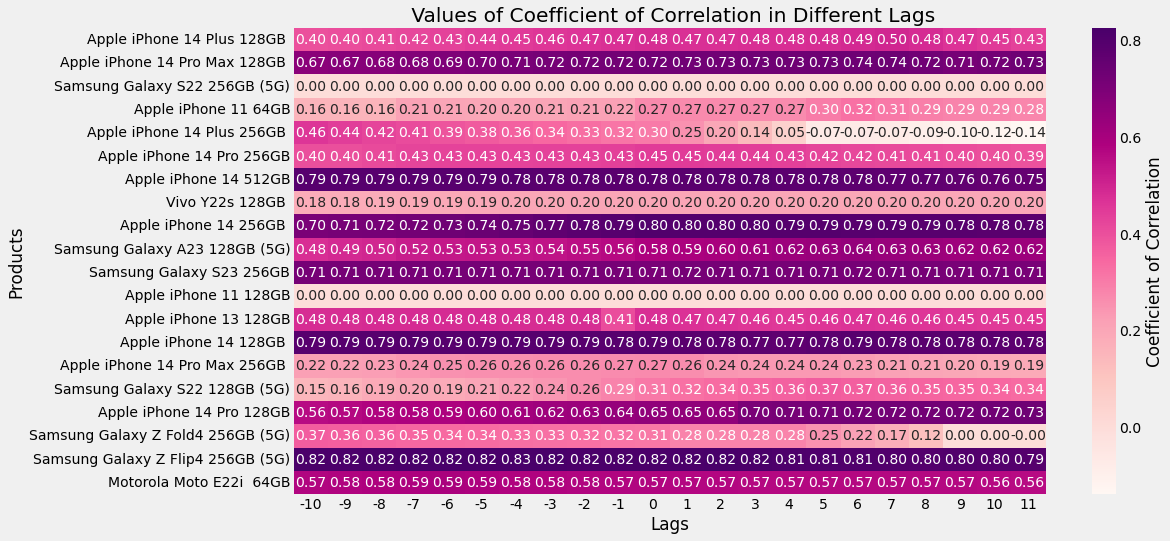

In [23]:
# Define o tamanho da figura
plt.figure(figsize=(15, 8))

# Cria um heatmap para valores positivos
heatmap_pos = sns.heatmap(df_all_product.T, cmap='RdPu', annot=True, fmt=".2f", cbar_kws={'label': 'Coefficient of Correlation'})
plt.title(' Values of Coefficient of Correlation in Different Lags')
plt.xlabel('Lags')
plt.ylabel('Products')

# Ajusta os rótulos dos eixos
plt.yticks(rotation=0)  # Mantém os rótulos do eixo y na posição horizontal
plt.savefig("IMG resultados 2/cc_r1.png", bbox_inches='tight')

plt.show()



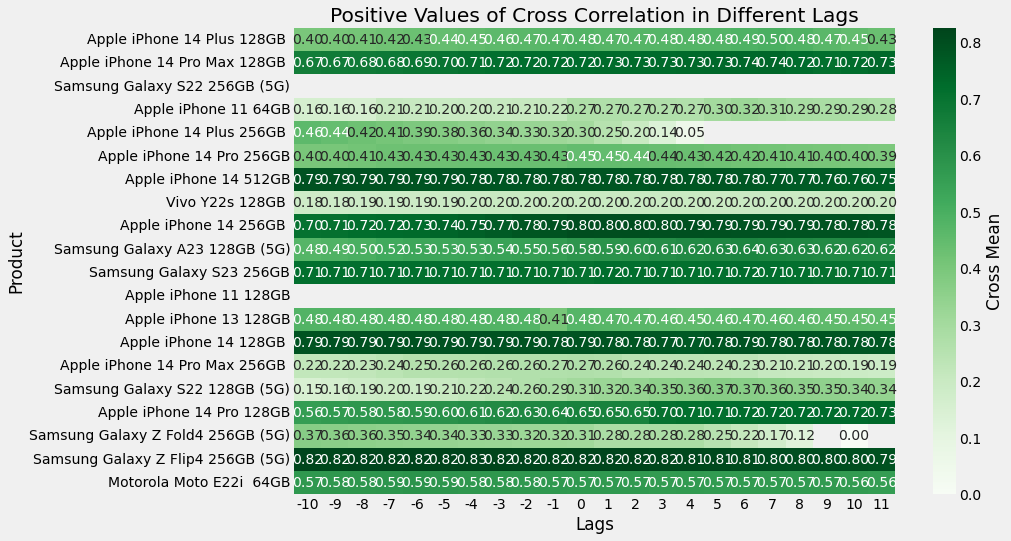

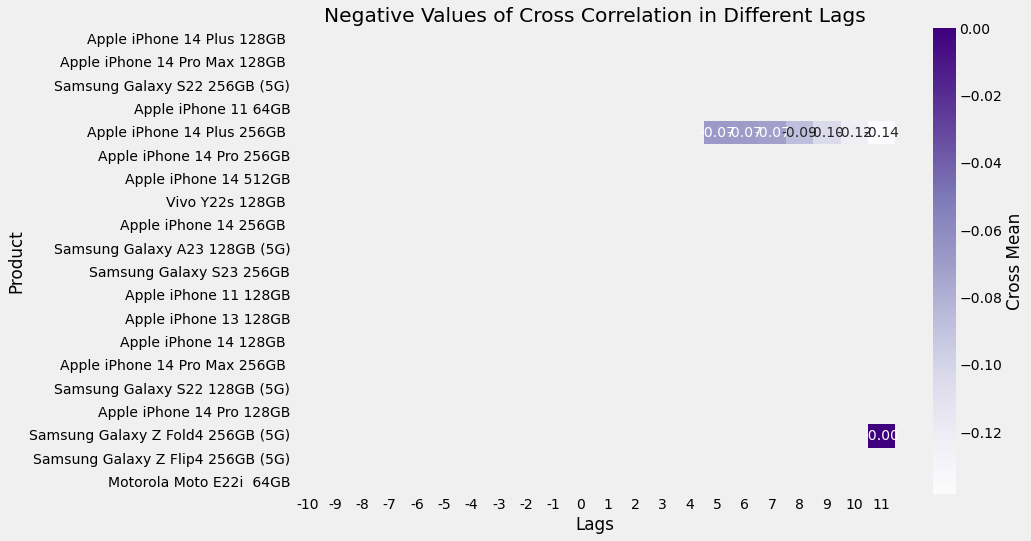

In [24]:
# Define o tamanho da figura
plt.figure(figsize=(12, 8))

# Separa os valores positivos e negativos
df_positives = df_all_product.where(df_all_product > 0)
df_negatives = df_all_product.where(df_all_product < 0)

# Cria um heatmap para valores positivos
heatmap_pos = sns.heatmap(df_positives.T, cmap='Greens', annot=True, fmt=".2f", cbar_kws={'label': 'Cross Mean'})
plt.title('Positive Values of Cross Correlation in Different Lags')
plt.xlabel('Lags')
plt.ylabel('Product')

# Ajusta os rótulos dos eixos
plt.yticks(rotation=0)  # Mantém os rótulos do eixo y na posição horizontal
plt.savefig("Exemplos/Exemplo- processed data all products in two companys/heatmap_pos_values_crosscorr_Wom_Falabella.png", bbox_inches='tight')

plt.show()

# Define o tamanho da figura
plt.figure(figsize=(12, 8))

# Cria um heatmap para valores negativos
heatmap_neg = sns.heatmap(df_negatives.T, cmap='Purples', annot=True, fmt=".2f", cbar_kws={'label': 'Cross Mean'})
plt.title('Negative Values of Cross Correlation in Different Lags')
plt.xlabel('Lags')
plt.ylabel('Product')

# Ajusta os rótulos dos eixos
plt.yticks(rotation=0)  # Mantém os rótulos do eixo y na posição horizontal
plt.savefig("Exemplos/Exemplo- processed data all products in two companys/heatmap_neg_values_crosscorr_Wom_Falabella.png", bbox_inches='tight')

plt.show()


# Dynamic time warping

In [25]:
def plot_warping_with_dates(s1, s2, path, filename):
    path = dtw.warping_path(s1,s2)
    dtwvis.plot_warping(s1,s2, path, filename=filename)
    return path

def warping_paths(s1_numeric,s2_numeric,filename):

    random.seed(1)
    for idx in range(len(s2_numeric)):
        if random.random() < 0.05:
            s2_numeric[idx] += (random.random() - 0.5) / 2

    d, paths = dtw.warping_paths(s1_numeric, s2_numeric, window=25, psi=2)
    best_path = dtw.best_path(paths)

    dtwvis.plot_warpingpaths(s1_numeric, s2_numeric, paths, best_path,filename=filename)
    plt.show() 

    plt.close()
    return d, best_path
    


In [26]:
def calculate_warping_percent( path, product):
    percentages = {'lag_neg': [], 'lag_zero': [], 'lag_pos': []} # Dicionário para armazenar as porcentagens
    contagens = {'lag_neg': [], 'lag_zero': [], 'lag_pos': []}
    count_neg = count_zero = count_pos = 0
    
    for i, j in path:
        difference = i - j
        if difference < 0:
            count_neg += 1
        elif difference == 0:
            count_zero += 1
        else:
            count_pos += 1

    total = len(path)
    percentages['lag_neg'] = (count_neg / total )*100
    percentages['lag_zero'] = (count_zero / total)*100
    percentages['lag_pos'] = (count_pos / total)*100
    
    percentages['count_lag_neg'] = count_neg 
    percentages['count_lag_zero'] = count_zero 
    percentages['count_lag_pos'] = count_pos 
    percentages['count_total'] = total
    
    

    df_percentages = pd.DataFrame(percentages, index=[product])
    

    return df_percentages

In [27]:
def calculate_warping_percent_best_path(best_path, product):
    
    percentages = {'lag_neg': [], 'lag_zero': [], 'lag_pos': []} # Dicionário para armazenar as porcentagens
    count_neg = count_zero = count_pos = 0
    differences = [point[1] - point[0] for point in best_path]
    
    # Contar os pontos acima, abaixo e na linha de regressão
    for diff in differences:
        if diff > 0:
            count_pos += 1
        elif diff < 0:
            count_neg += 1
        else:
            count_zero += 1


    total = len(best_path)
    percentages['lag_neg'] = (count_neg / total )*100
    percentages['lag_zero'] = (count_zero / total)*100
    percentages['lag_pos'] = (count_pos / total)*100
    
    percentages['count_lag_neg'] = count_neg 
    percentages['count_lag_zero'] = count_zero 
    percentages['count_lag_pos'] = count_pos 
    percentages['count_total'] = total
    
    
    df_percentages = pd.DataFrame(percentages, index=[product])

    return df_percentages, differences


In [28]:
company1 = 'Wom / Loyalty'
company2 = 'Falabella / Loyalty'
df_percentages_path = pd.DataFrame()
df_percentages_best_path = pd.DataFrame()
df_result_path = pd.DataFrame()
df_result_best_path = pd.DataFrame()

l = ['lag_neg',  'lag_zero', 'lag_pos', 'count_lag_neg', 'count_lag_zero', 'count_lag_pos', 'count_total']

for product in common_products:
    
    data_serie = create_dataserie(df_company1, df_company2, company1, company2, product)
    
    s1 = data_serie[company1].astype(float).tolist()
    s2 = data_serie[company2].astype(float).tolist()
    
    path = plot_warping_with_dates(s1, s2, path, filename="Exemplos/Exemplo- processed data all products in two companys/warp_Wom_Falabella" + product + ".png")
    
    s1_numeric = data_serie[company1].astype(float).to_numpy()
    s2_numeric = data_serie[company2].astype(float).to_numpy()
    d, best_path = warping_paths(s1_numeric, s2_numeric, "Exemplos/Exemplo- processed data all products in two companys/warping_paths_example_Wom_Falabella" + product + ".png")
    df_percentages_path = calculate_warping_percent(path, product)
    df_percentages_best_path,dif = calculate_warping_percent_best_path(best_path, product)
  
    
    df_result_path = pd.concat([df_result_path, df_percentages_path])
    df_result_best_path = pd.concat([df_result_best_path, df_percentages_best_path])



In [29]:
df_result_path #path

,lag_neg,lag_zero,lag_pos,count_lag_neg,count_lag_zero,count_lag_pos,count_total
Apple iPhone 14 Plus 128GB,48.837209,40.826873,10.335917,189,158,40,387
Apple iPhone 14 Pro Max 128GB,37.187500,41.875000,20.937500,119,134,67,320
Samsung Galaxy S22 256GB (5G),0.000000,100.000000,0.000000,0,41,0,41
Apple iPhone 11 64GB,92.359551,7.640449,0.000000,411,34,0,445
Apple iPhone 14 Plus 256GB,0.000000,79.130435,20.869565,0,182,48,230
Apple iPhone 14 Pro 256GB,69.354839,15.322581,15.322581,258,57,57,372
Apple iPhone 14 512GB,35.838150,35.260116,28.901734,124,122,100,346
Vivo Y22s 128GB,38.625592,26.066351,35.308057,163,110,149,422
Apple iPhone 14 256GB,15.071770,49.521531,35.406699,63,207,148,418
Samsung Galaxy A23 128GB (5G),57.177033,7.894737,34.928230,239,33,146,418


In [30]:
df_result_best_path #best path

,lag_neg,lag_zero,lag_pos,count_lag_neg,count_lag_zero,count_lag_pos,count_total
Apple iPhone 14 Plus 128GB,62.461538,16.923077,20.615385,203,55,67,325
Apple iPhone 14 Pro Max 128GB,60.802469,0.617284,38.580247,197,2,125,324
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,0,0,46,46
Apple iPhone 11 64GB,56.770833,1.562500,41.666667,218,6,160,384
Apple iPhone 14 Plus 256GB,87.719298,0.438596,11.842105,200,1,27,228
Apple iPhone 14 Pro 256GB,79.566563,0.928793,19.504644,257,3,63,323
Apple iPhone 14 512GB,30.746269,11.343284,57.910448,103,38,194,335
Vivo Y22s 128GB,27.594937,0.506329,71.898734,109,2,284,395
Apple iPhone 14 256GB,6.683805,47.300771,46.015424,26,184,179,389
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,162,21,209,392


In [31]:
dif_por_produto = {}

for produto in common_products:
    
    
    
    total = len(dif)
    dif_percentages = {'Difference': [], produto: []}  # Corrigindo para usar o nome do produto como coluna

    unique_diffs = set(dif)
    for diff in unique_diffs:
        percent_diff = dif.count(diff) / total * 100
        dif_percentages['Difference'].append(diff)
        dif_percentages[produto].append(percent_diff)

    df_dif_percentages = pd.DataFrame(dif_percentages)
    df_dif_percentages.set_index('Difference', inplace=True)  # Definindo a coluna 'Difference' como índice
    dif_por_produto[produto] = df_dif_percentages

# Concatenar todos os DataFrames em um único DataFrame
result_df = pd.concat(dif_por_produto.values(), axis=1)

result_df

,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
Difference,,,,,,,,,,,,,,,,,,,,
0,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713
1,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713
2,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713
3,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713
4,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713
5,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713,0.574713
6,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264,7.471264
-24,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954,41.091954
-23,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138,1.724138


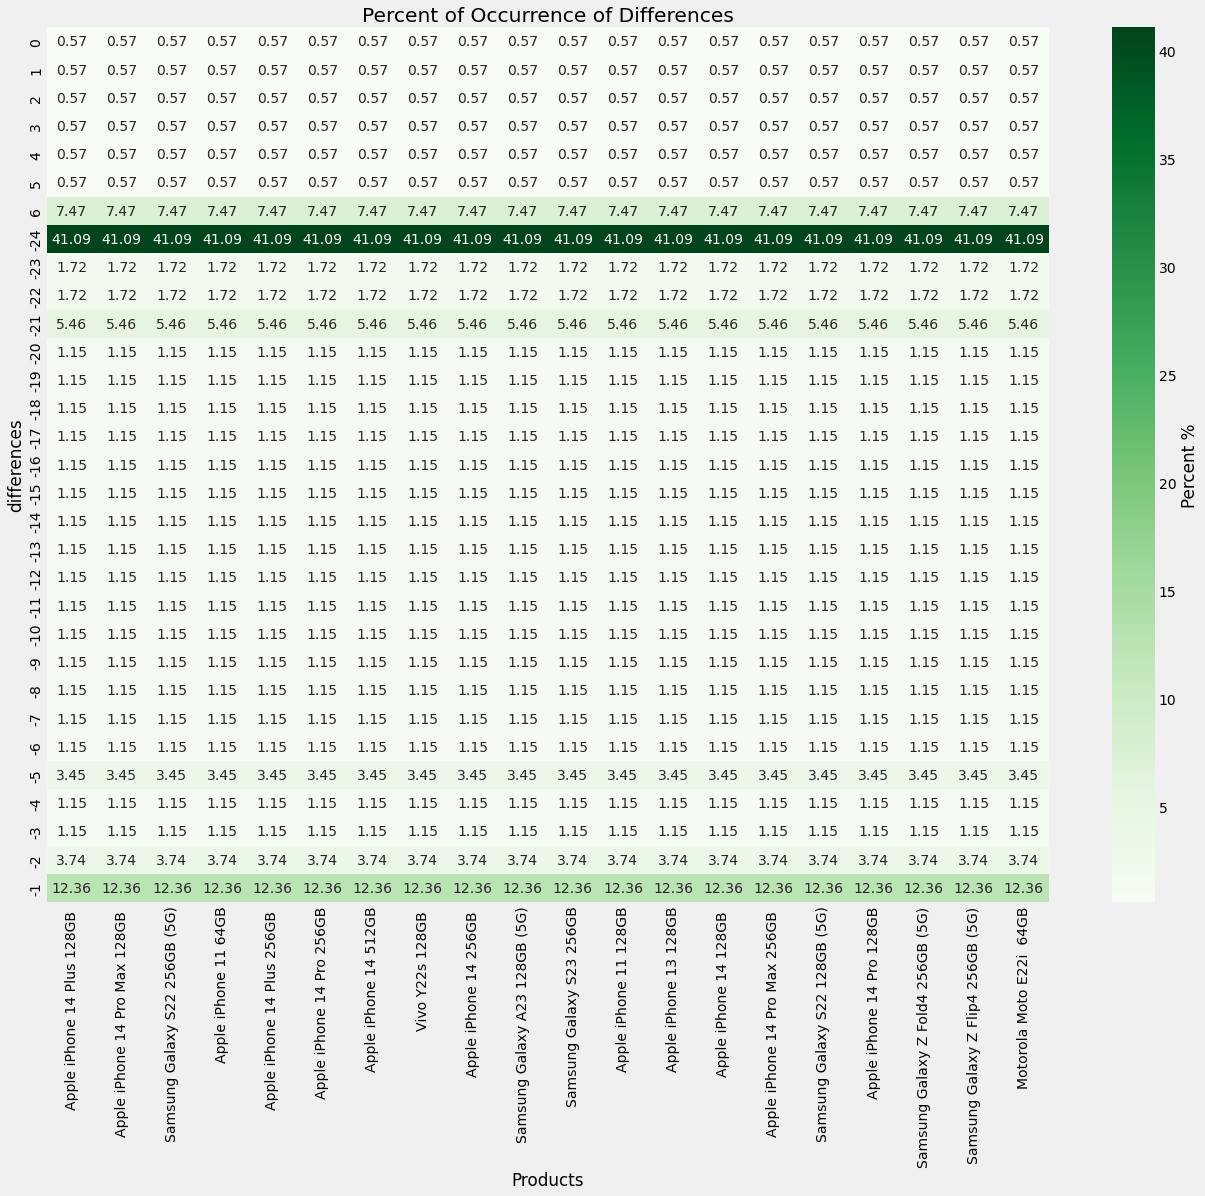

In [32]:
plt.figure(figsize=(20, 15))
sns.heatmap(result_df, cmap="Greens", annot=True, fmt=".2f", cbar_kws={'label': 'Percent %'})
plt.title('Percent of Occurrence of Differences')
plt.xlabel('Products')
plt.ylabel('differences')
plt.savefig("IMG resultados 2/dtw_r2.png", bbox_inches='tight')
plt.show()


In [33]:
df_result_best_path

,lag_neg,lag_zero,lag_pos,count_lag_neg,count_lag_zero,count_lag_pos,count_total
Apple iPhone 14 Plus 128GB,62.461538,16.923077,20.615385,203,55,67,325
Apple iPhone 14 Pro Max 128GB,60.802469,0.617284,38.580247,197,2,125,324
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,0,0,46,46
Apple iPhone 11 64GB,56.770833,1.562500,41.666667,218,6,160,384
Apple iPhone 14 Plus 256GB,87.719298,0.438596,11.842105,200,1,27,228
Apple iPhone 14 Pro 256GB,79.566563,0.928793,19.504644,257,3,63,323
Apple iPhone 14 512GB,30.746269,11.343284,57.910448,103,38,194,335
Vivo Y22s 128GB,27.594937,0.506329,71.898734,109,2,284,395
Apple iPhone 14 256GB,6.683805,47.300771,46.015424,26,184,179,389
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,162,21,209,392


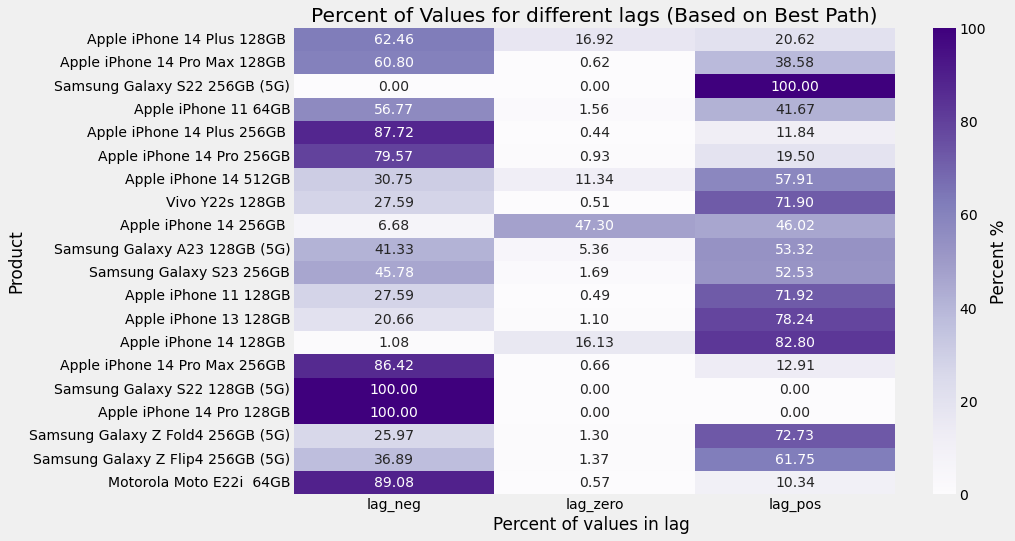

In [34]:

plt.figure(figsize=(12, 8))


df_selected_dtw_best_path = df_result_best_path[['lag_neg', 'lag_zero', 'lag_pos']]

heatmap_pos = sns.heatmap(df_selected_dtw_best_path, cmap='Purples', annot=True, fmt=".2f", cbar_kws={'label': 'Percent %'})
plt.title('Percent of Values for different lags (Based on Best Path)')
plt.xlabel('Percent of values in lag ')
plt.ylabel('Product')
plt.savefig("IMG resultados 2/dtw_r1.png", bbox_inches='tight')

plt.show()

In [35]:
df_dtw_results_path=df_result_path[['lag_neg', 'lag_zero', 'lag_pos']]
df_dtw_results_best_path=df_result_best_path[['lag_neg', 'lag_zero', 'lag_pos']]


### Weighted Average

In [36]:
weighted_avg_neg = (df_result_best_path['lag_neg'] * df_result_best_path['count_total']).sum() / df_result_best_path['count_total'].sum()
weighted_avg_zero = (df_result_best_path['lag_zero'] * df_result_best_path['count_total']).sum() / df_result_best_path['count_total'].sum()
weighted_avg_pos = (df_result_best_path['lag_pos'] * df_result_best_path['count_total']).sum() / df_result_best_path['count_total'].sum()


print("Weighted Average for Negative Lags:", weighted_avg_neg)
print("Weighted Average for Zero Lags:", weighted_avg_zero)
print("Weighted Average for Positive Lags:", weighted_avg_pos)

som=weighted_avg_neg+ weighted_avg_zero+weighted_avg_pos
som

Weighted Average for Negative Lags: 49.72589487262174
Weighted Average for Zero Lags: 6.3689132537891
Weighted Average for Positive Lags: 43.90519187358917


100.0

In [37]:
df_cc_values

,lag_neg,lag_zero,lag_pos
Apple iPhone 14 Plus 128GB,0.473336,0.480665,0.497683
Apple iPhone 14 Pro Max 128GB,0.721097,0.724188,0.736614
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,0.000000
Apple iPhone 11 64GB,0.219027,0.271913,0.321306
Apple iPhone 14 Plus 256GB,0.460985,0.302480,0.254708
Apple iPhone 14 Pro 256GB,0.434818,0.445614,0.446177
Apple iPhone 14 512GB,0.790189,0.783967,0.784797
Vivo Y22s 128GB,0.201887,0.202242,0.201761
Apple iPhone 14 256GB,0.788514,0.800862,0.798984
Samsung Galaxy A23 128GB (5G),0.562428,0.584629,0.641159


## Confusion matrix

In [38]:

max_cc_column = df_cc_values.idxmax(axis=1)
max_dtw_path_column = df_dtw_results_path.idxmax(axis=1)
max_dtw_best_path_column= df_dtw_results_best_path.idxmax(axis=1)


df_max_values = pd.DataFrame({
    'cc': max_cc_column,
    
    'dtw best path': max_dtw_best_path_column
}, index=df_cc_values.index)


df_max_values


,cc,dtw best path
Apple iPhone 14 Plus 128GB,lag_pos,lag_neg
Apple iPhone 14 Pro Max 128GB,lag_pos,lag_neg
Samsung Galaxy S22 256GB (5G),lag_neg,lag_pos
Apple iPhone 11 64GB,lag_pos,lag_neg
Apple iPhone 14 Plus 256GB,lag_neg,lag_neg
Apple iPhone 14 Pro 256GB,lag_pos,lag_neg
Apple iPhone 14 512GB,lag_neg,lag_pos
Vivo Y22s 128GB,lag_zero,lag_pos
Apple iPhone 14 256GB,lag_zero,lag_zero
Samsung Galaxy A23 128GB (5G),lag_pos,lag_pos


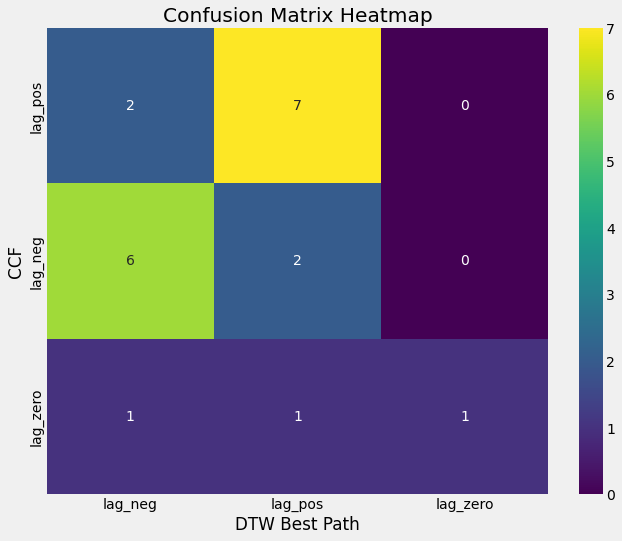

In [39]:

confusion_matrix = metrics.confusion_matrix(df_max_values['cc'], df_max_values['dtw best path'])


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=df_max_values['dtw best path'].unique())


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix, cmap='viridis', annot=True, fmt='d')


plt.title('Confusion Matrix Heatmap')


plt.xlabel('DTW Best Path')
plt.ylabel('CCF')

heatmap.set_xticklabels(df_max_values['dtw best path'].unique())
heatmap.set_yticklabels(df_max_values['cc'].unique())

plt.savefig("IMG resultados 2/confusion_matrix_1.png", bbox_inches='tight')


plt.show()


In [40]:
df_selected = df_result_best_path[['lag_neg', 'lag_zero', 'lag_pos']]
df_selected

,lag_neg,lag_zero,lag_pos
Apple iPhone 14 Plus 128GB,62.461538,16.923077,20.615385
Apple iPhone 14 Pro Max 128GB,60.802469,0.617284,38.580247
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000
Apple iPhone 11 64GB,56.770833,1.562500,41.666667
Apple iPhone 14 Plus 256GB,87.719298,0.438596,11.842105
Apple iPhone 14 Pro 256GB,79.566563,0.928793,19.504644
Apple iPhone 14 512GB,30.746269,11.343284,57.910448
Vivo Y22s 128GB,27.594937,0.506329,71.898734
Apple iPhone 14 256GB,6.683805,47.300771,46.015424
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327


# Clustering Analyse 

In [41]:

df_selected.reset_index(inplace=True)


print(df_selected)

                                index     lag_neg   lag_zero     lag_pos
0         Apple iPhone 14 Plus 128GB    62.461538  16.923077   20.615385
1      Apple iPhone 14 Pro Max 128GB    60.802469   0.617284   38.580247
2       Samsung Galaxy S22 256GB (5G)    0.000000   0.000000  100.000000
3                Apple iPhone 11 64GB   56.770833   1.562500   41.666667
4         Apple iPhone 14 Plus 256GB    87.719298   0.438596   11.842105
5           Apple iPhone 14 Pro 256GB   79.566563   0.928793   19.504644
6               Apple iPhone 14 512GB   30.746269  11.343284   57.910448
7                    Vivo Y22s 128GB    27.594937   0.506329   71.898734
8              Apple iPhone 14 256GB     6.683805  47.300771   46.015424
9       Samsung Galaxy A23 128GB (5G)   41.326531   5.357143   53.316327
10           Samsung Galaxy S23 256GB   45.783133   1.686747   52.530120
11              Apple iPhone 11 128GB   27.586207   0.492611   71.921182
12              Apple iPhone 13 128GB   20.661157  

In [42]:

df_selected.rename(columns={'index': 'product'}, inplace=True)


print(df_selected)


                              product     lag_neg   lag_zero     lag_pos
0         Apple iPhone 14 Plus 128GB    62.461538  16.923077   20.615385
1      Apple iPhone 14 Pro Max 128GB    60.802469   0.617284   38.580247
2       Samsung Galaxy S22 256GB (5G)    0.000000   0.000000  100.000000
3                Apple iPhone 11 64GB   56.770833   1.562500   41.666667
4         Apple iPhone 14 Plus 256GB    87.719298   0.438596   11.842105
5           Apple iPhone 14 Pro 256GB   79.566563   0.928793   19.504644
6               Apple iPhone 14 512GB   30.746269  11.343284   57.910448
7                    Vivo Y22s 128GB    27.594937   0.506329   71.898734
8              Apple iPhone 14 256GB     6.683805  47.300771   46.015424
9       Samsung Galaxy A23 128GB (5G)   41.326531   5.357143   53.316327
10           Samsung Galaxy S23 256GB   45.783133   1.686747   52.530120
11              Apple iPhone 11 128GB   27.586207   0.492611   71.921182
12              Apple iPhone 13 128GB   20.661157  

/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4468/640939234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns={'index': 'product'}, inplace=True)


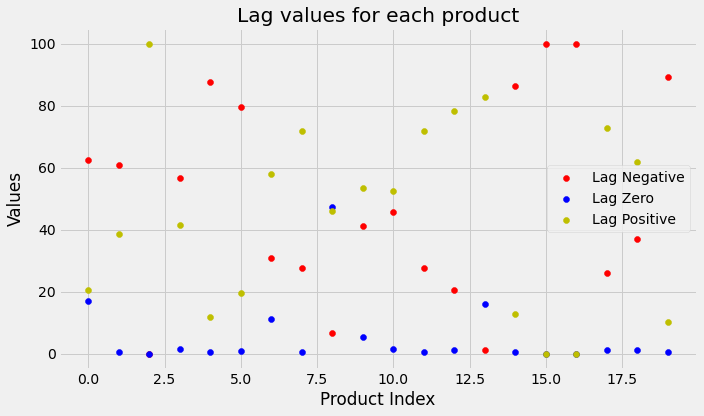

In [43]:

lag_neg = df_selected['lag_neg']
lag_zero = df_selected['lag_zero']
lag_pos = df_selected['lag_pos']


fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(df_selected.index, lag_neg, label='Lag Negative', color='r')
ax.scatter(df_selected.index, lag_zero, label='Lag Zero', color='b')
ax.scatter(df_selected.index, lag_pos, label='Lag Positive', color='y')


ax.set_xlabel('Product Index')
ax.set_ylabel('Values')
ax.set_title('Lag values for each product')
ax.legend()


plt.tight_layout()
plt.show()


/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4468/1741724038.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.labels_


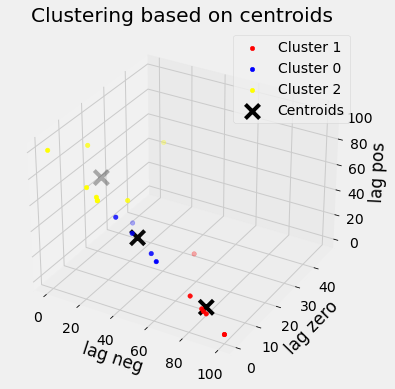

Coordinates of the centroids: [48.3136423  86.46452871 17.54020859] [2.1179588  2.7896329  9.77158208] [49.56839889 10.74583839 72.68820933]


In [44]:
import matplotlib.pyplot as plt
import sklearn.cluster
import pandas as pd


kmeans = sklearn.cluster.KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df_selected[['lag_neg', 'lag_zero', 'lag_pos']])


df_selected['cluster'] = kmeans.labels_


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


colors = {0: 'blue', 1: 'red', 2: 'yellow'}


for cluster in df_selected['cluster'].unique():
    ax.scatter(df_selected[df_selected['cluster'] == cluster]['lag_neg'],
               df_selected[df_selected['cluster'] == cluster]['lag_zero'],
               df_selected[df_selected['cluster'] == cluster]['lag_pos'],
               label=f'Cluster {cluster}',
               color=colors[cluster])


ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
           marker='x', color='black', s=200, label='Centroids')

ax.set_xlabel('lag neg')
ax.set_ylabel('lag zero')
ax.set_zlabel('lag pos')

plt.title('Clustering based on centroids')
plt.legend()

plt.savefig("IMG resultados 2/dtw_clus_1.png", bbox_inches='tight')
plt.show()

print("Coordinates of the centroids:", kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2])


In [45]:
df_selected

,product,lag_neg,lag_zero,lag_pos,cluster
0,Apple iPhone 14 Plus 128GB,62.461538,16.923077,20.615385,1
1,Apple iPhone 14 Pro Max 128GB,60.802469,0.617284,38.580247,0
2,Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,2
3,Apple iPhone 11 64GB,56.770833,1.562500,41.666667,0
4,Apple iPhone 14 Plus 256GB,87.719298,0.438596,11.842105,1
5,Apple iPhone 14 Pro 256GB,79.566563,0.928793,19.504644,1
6,Apple iPhone 14 512GB,30.746269,11.343284,57.910448,2
7,Vivo Y22s 128GB,27.594937,0.506329,71.898734,2
8,Apple iPhone 14 256GB,6.683805,47.300771,46.015424,2
9,Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,0


In [46]:

df_selected['max_value_column'] = df_selected[['lag_neg', 'lag_zero', 'lag_pos']].idxmax(axis=1)

df_selected['cluster'] = kmeans.labels_


print("Representation with product name, lag type, column name with maximum value and cluster:")
df_selected[['product', 'max_value_column', 'cluster']]


Representation with product name, lag type, column name with maximum value and cluster:


/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4468/1945315310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['max_value_column'] = df_selected[['lag_neg', 'lag_zero', 'lag_pos']].idxmax(axis=1)
/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4468/1945315310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.labels_


,product,max_value_column,cluster
0,Apple iPhone 14 Plus 128GB,lag_neg,1
1,Apple iPhone 14 Pro Max 128GB,lag_neg,0
2,Samsung Galaxy S22 256GB (5G),lag_pos,2
3,Apple iPhone 11 64GB,lag_neg,0
4,Apple iPhone 14 Plus 256GB,lag_neg,1
5,Apple iPhone 14 Pro 256GB,lag_neg,1
6,Apple iPhone 14 512GB,lag_pos,2
7,Vivo Y22s 128GB,lag_pos,2
8,Apple iPhone 14 256GB,lag_zero,2
9,Samsung Galaxy A23 128GB (5G),lag_pos,0


In [47]:
df_selected

,product,lag_neg,lag_zero,lag_pos,cluster,max_value_column
0,Apple iPhone 14 Plus 128GB,62.461538,16.923077,20.615385,1,lag_neg
1,Apple iPhone 14 Pro Max 128GB,60.802469,0.617284,38.580247,0,lag_neg
2,Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,2,lag_pos
3,Apple iPhone 11 64GB,56.770833,1.562500,41.666667,0,lag_neg
4,Apple iPhone 14 Plus 256GB,87.719298,0.438596,11.842105,1,lag_neg
5,Apple iPhone 14 Pro 256GB,79.566563,0.928793,19.504644,1,lag_neg
6,Apple iPhone 14 512GB,30.746269,11.343284,57.910448,2,lag_pos
7,Vivo Y22s 128GB,27.594937,0.506329,71.898734,2,lag_pos
8,Apple iPhone 14 256GB,6.683805,47.300771,46.015424,2,lag_zero
9,Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,0,lag_pos


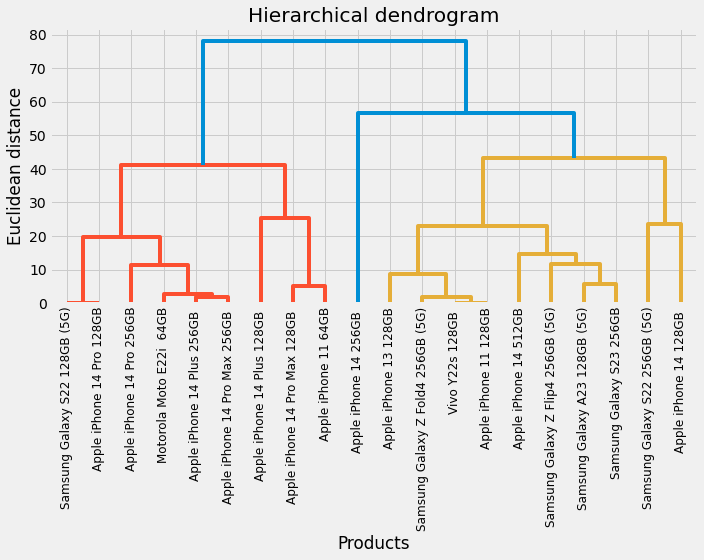

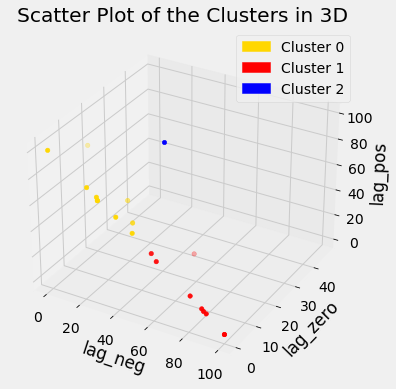

In [48]:

lag_data = df_selected[['lag_neg', 'lag_zero', 'lag_pos']]


scaler = StandardScaler()
lag_data_scaled = list(zip(df_selected['lag_neg'], df_selected['lag_zero'], df_selected['lag_pos']))


Z = linkage(lag_data_scaled, method='average', metric='euclidean')

plt.figure(figsize=(10, 8))
dendrogram(Z, labels=df_selected['product'].values)
plt.title('Hierarchical dendrogram')
plt.xlabel('Products')
plt.ylabel('Euclidean distance')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.savefig("IMG resultados 2/dtw_clus_2.png", bbox_inches='tight')
plt.show()


import matplotlib.patches as mpatches


cores_cluster = {0: '#FFD700',  # yellow
                 1: '#FF0000',  # red
                 2: '#0000FF'}  # blue


hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(lag_data_scaled)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


for label in range(3):
    cluster_indices = labels == label
    ax.scatter(df_selected.loc[cluster_indices, 'lag_neg'], df_selected.loc[cluster_indices, 'lag_zero'], df_selected.loc[cluster_indices, 'lag_pos'], c=cores_cluster[label], label=f'Cluster {label}')


ax.set_xlabel('lag_neg')
ax.set_ylabel('lag_zero')
ax.set_zlabel('lag_pos')


legend_handles = [mpatches.Patch(color=cores_cluster[label], label=f'Cluster {label}') for label in range(3)]


plt.legend(handles=legend_handles, loc='upper right')


plt.title('Scatter Plot of the Clusters in 3D')
plt.savefig("IMG resultados 2/dtw_clus_2_1.png", bbox_inches='tight')
plt.show()



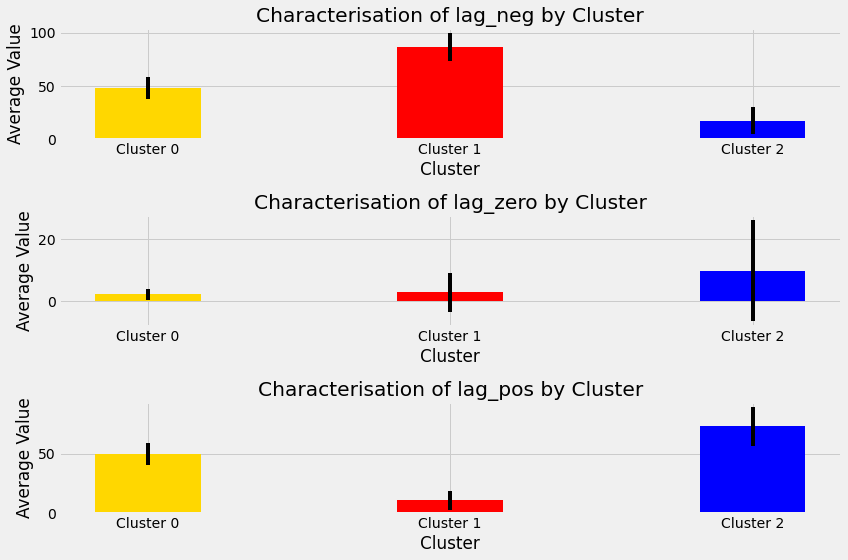

In [121]:

cluster_stats = df_selected.groupby('cluster')[['lag_neg', 'lag_zero', 'lag_pos']].agg(['mean', 'std'])


n_clusters = len(cluster_stats)
n_lags = len(cluster_stats.columns.levels[0])
bar_width = 0.35
index = np.arange(n_clusters)

fig, axes = plt.subplots(nrows=n_lags, ncols=1, figsize=(12, 8))

lag_types = cluster_stats.columns.levels[0]


cores_cluster = {0: '#FFD700',  # yellow
                 1: '#FF0000',  # red
                 2: '#0000FF'}  # blue

for i, lag_type in enumerate(lag_types):
    means = cluster_stats[lag_type]['mean']
    stds = cluster_stats[lag_type]['std']
    ax = axes[i]
    for cluster, cor in cores_cluster.items():
        ax.bar(cluster, means[cluster], bar_width, yerr=stds[cluster], label=f'Cluster {cluster}', color=cor)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Average Value')
    ax.set_title(f'Characterisation of {lag_type} by Cluster')
    ax.set_xticks(list(cores_cluster.keys()))
    ax.set_xticklabels([f'Cluster {i}' for i in list(cores_cluster.keys())])

plt.tight_layout()
plt.savefig("IMG resultados 2/dtw_clus_3.png", bbox_inches='tight')
plt.show()


In [50]:
print(df_selected['cluster'].value_counts()) 

cluster
2    8
1    7
0    5
Name: count, dtype: int64


# Intantaneous phase synchrony

In [51]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y


In [52]:
def inst_phase_synchrony(s1,s2,filename):
    lowcut  = .01
    highcut = .5
    fs = 30.
    order = 1
    d1 = s1
    d2 = s2

    min_length = min(len(d1), len(d2))
    d1 = d1[:min_length]
    d2 = d2[:min_length]

    y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
    y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

    al1 = np.angle(hilbert(y1),deg=False)
    al2 = np.angle(hilbert(y2),deg=False)
    phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
    N = len(al1)
    
    # Plot results
    f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
    ax[0].plot(y1,color='r',label='y1')
    ax[0].plot(y2,color='b',label='y2')
    ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
    ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
    ax[1].plot(al1,color='r')
    ax[1].plot(al2,color='b')
    ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
    phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
    ax[2].plot(phase_synchrony)
    ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
    plt.tight_layout()
    plt.savefig(filename, bbox_inches='tight')

    plt.close()

    return al1, al2

In [53]:
company1 = 'Wom / Loyalty'
company2 = 'Falabella / Loyalty'
df_phase_differences=pd.DataFrame()
for product in common_products:
#product='Apple iPhone 14 Plus 128GB'
    data_serie=create_dataserie(df_company1, df_company2, company1, company2, product)
    s1 = data_serie[company1].astype(float)
    s2 = data_serie[company2].astype(float)
    s1_centred=s1-s1.mean()
    s2_centred=s2-s2.mean()
    al1,al2= inst_phase_synchrony(s1_centred,s2_centred,"Exemplos/Exemplo- processed data all products in two companys/plot_IPS_Wom_Falabella"+product+".png")
    
    
    #al1,al2= inst_phase_synchrony(s1,s2,"Exemplos/Exemplo- processed data all products in two companys/plot_IPS_Wom_Falabella"+product+".png")
    phase_differences = al1 - al2
    serie_phase_differences = pd.Series(phase_differences, name=product)
    
    
    df_phase_differences = pd.concat([df_phase_differences, serie_phase_differences], axis=1)


df_phase_differences

,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
0,1.471157,0.063567,0.011761,0.982324,1.271158,0.010410,0.178348,0.142966,-0.027678,0.096340,-0.062338,3.486797,0.089341,-0.062680,0.301206,-0.145342,-0.235471,-0.263246,-0.103903,0.036430
1,1.650332,0.131286,0.133149,1.035767,1.436188,0.026520,0.289041,0.228531,-0.049694,0.127758,-0.053827,3.614052,0.128926,-0.115054,0.626642,-0.269776,-0.239169,-0.318768,-0.152085,0.070924
2,1.752263,0.131023,0.164273,1.014865,1.567711,0.033012,0.282343,0.204774,-0.054975,0.126006,-0.020463,3.570018,0.128194,-0.115002,0.657301,-0.270713,-0.217166,-0.290831,-0.138133,0.070122
3,1.716402,0.175262,0.272517,0.973857,1.498921,0.049075,0.336459,0.235106,-0.068978,0.128455,0.004607,3.563958,0.149159,-0.143911,0.841249,-0.330215,-0.190660,-0.273828,-0.151983,0.091455
4,1.793031,0.173583,0.315290,0.963874,1.588663,0.057041,0.327440,0.209439,-0.077037,0.127320,0.035439,3.490239,0.149945,-0.143748,0.870733,-0.333372,-0.174867,-0.254270,-0.134380,0.089642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003878,NaN,NaN,NaN,NaN,0.045389,NaN,NaN,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002215,NaN,NaN,NaN,NaN,0.041783,NaN,NaN,NaN,NaN,NaN,NaN
331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031786,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029001,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
df_phase_differences['Apple iPhone 14 Plus 128GB ']

0      1.471157
1      1.650332
2      1.752263
3      1.716402
4      1.793031
         ...   
329         NaN
330         NaN
331         NaN
332         NaN
333         NaN
Name: Apple iPhone 14 Plus 128GB , Length: 334, dtype: float64

In [55]:
def calcular_percentage_lag(phase_differences):
    total_points = len(phase_differences)
    lag_positivo = 0
    lag_negativo = 0
    lag_zero = 0
    
    for difference in phase_differences:
        if difference > 0:
            lag_positivo += 1
        elif difference < 0:
            lag_negativo += 1
        else:
            lag_zero += 1
    
    percentage_lag_positivo = (lag_positivo / total_points) * 100
    percentage_lag_negativo = (lag_negativo / total_points) * 100
    percentage_lag_zero = (lag_zero / total_points) * 100
    total=percentage_lag_positivo+percentage_lag_negativo+ percentage_lag_zero
    
    return percentage_lag_positivo, percentage_lag_zero, percentage_lag_negativo, total


In [56]:

df_percents_IPS = pd.DataFrame(columns=['lag_neg','lag_zero', 'lag_pos'], index=common_products)


for product in common_products:
    df = df_phase_differences[product].dropna()
    
    percentage_lag_positivo, percentage_lag_zero, percentage_lag_negativo, total = calcular_percentage_lag(df)
    
    
    df_percents_IPS.loc[product] = [percentage_lag_negativo, percentage_lag_zero, percentage_lag_positivo]


print(df_percents_IPS)



                                     lag_neg lag_zero    lag_pos
Apple iPhone 14 Plus 128GB          50.33557      0.0   49.66443
Apple iPhone 14 Pro Max 128GB      85.714286      0.0  14.285714
Samsung Galaxy S22 256GB (5G)      34.146341      0.0  65.853659
Apple iPhone 11 64GB               46.905537      0.0  53.094463
Apple iPhone 14 Plus 256GB           63.2287      0.0    36.7713
Apple iPhone 14 Pro 256GB          63.636364      0.0  36.363636
Apple iPhone 14 512GB              14.532872      0.0  85.467128
Vivo Y22s 128GB                    52.905199      0.0  47.094801
Apple iPhone 14 256GB              91.540785      0.0   8.459215
Samsung Galaxy A23 128GB (5G)      36.120401      0.0  63.879599
Samsung Galaxy S23 256GB           60.983607      0.0  39.016393
Apple iPhone 11 128GB              46.078431      0.0  53.921569
Apple iPhone 13 128GB              50.347222      0.0  49.652778
Apple iPhone 14 128GB              58.682635      0.0  41.317365
Apple iPhone 14 Pro Max 2

In [57]:
df_percents_IPS

,lag_neg,lag_zero,lag_pos
Apple iPhone 14 Plus 128GB,50.33557,0.0,49.66443
Apple iPhone 14 Pro Max 128GB,85.714286,0.0,14.285714
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659
Apple iPhone 11 64GB,46.905537,0.0,53.094463
Apple iPhone 14 Plus 256GB,63.2287,0.0,36.7713
Apple iPhone 14 Pro 256GB,63.636364,0.0,36.363636
Apple iPhone 14 512GB,14.532872,0.0,85.467128
Vivo Y22s 128GB,52.905199,0.0,47.094801
Apple iPhone 14 256GB,91.540785,0.0,8.459215
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599


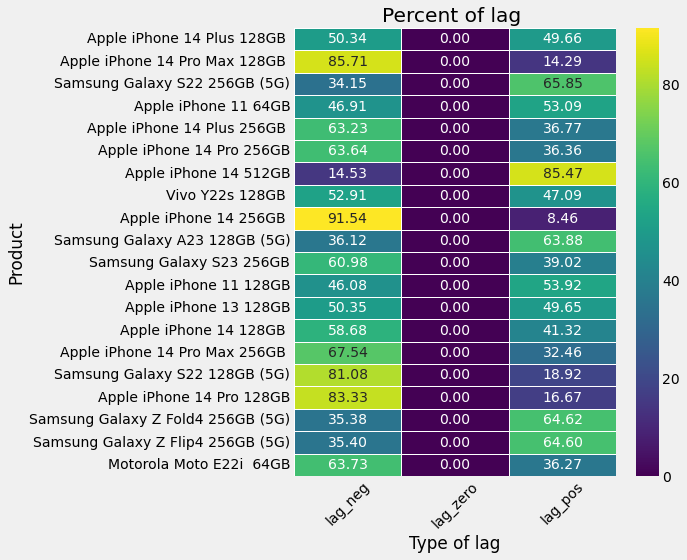

In [58]:

df_percents_IPS['lag_neg'] = pd.to_numeric(df_percents_IPS['lag_neg'])
df_percents_IPS['lag_zero'] = pd.to_numeric(df_percents_IPS['lag_zero'])
df_percents_IPS['lag_pos'] = pd.to_numeric(df_percents_IPS['lag_pos'])


plt.figure(figsize=(10, 8))
sns.heatmap(df_percents_IPS, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Percent of lag ')
plt.xlabel('Type of lag')
plt.ylabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("IMG resultados 2/ips_r1.png", bbox_inches='tight')

plt.show()


In [59]:


max_cc_column = df_cc_values.idxmax(axis=1)
max_dtw_path_column = df_dtw_results_path.idxmax(axis=1)
max_dtw_best_path_column= df_dtw_results_best_path.idxmax(axis=1)
max_ips_column=df_percents_IPS.idxmax(axis=1)


df_max_values2 = pd.DataFrame({
    
    
    'dtw best path': max_dtw_best_path_column,
    
    'IPS':max_ips_column
}, index=df_percents_IPS.index)


df_max_values2

,dtw best path,IPS
Apple iPhone 14 Plus 128GB,lag_neg,lag_neg
Apple iPhone 14 Pro Max 128GB,lag_neg,lag_neg
Samsung Galaxy S22 256GB (5G),lag_pos,lag_pos
Apple iPhone 11 64GB,lag_neg,lag_pos
Apple iPhone 14 Plus 256GB,lag_neg,lag_neg
Apple iPhone 14 Pro 256GB,lag_neg,lag_neg
Apple iPhone 14 512GB,lag_pos,lag_pos
Vivo Y22s 128GB,lag_pos,lag_neg
Apple iPhone 14 256GB,lag_zero,lag_neg
Samsung Galaxy A23 128GB (5G),lag_pos,lag_pos


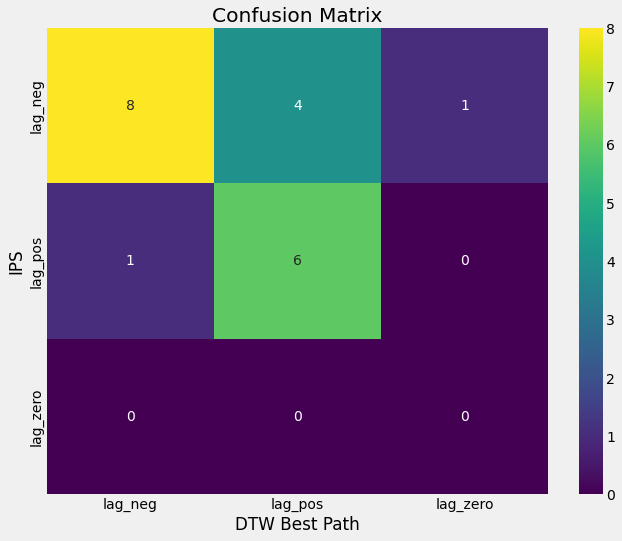

In [60]:

confusion_matrix = metrics.confusion_matrix(df_max_values2['IPS'], df_max_values2['dtw best path'])


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=df_max_values2['dtw best path'].unique())


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix, cmap='viridis', annot=True, fmt='d')


plt.title('Confusion Matrix')


plt.xlabel('DTW Best Path')
plt.ylabel('IPS')


heatmap.set_xticklabels(['lag_neg', 'lag_pos','lag_zero'])

heatmap.set_yticklabels(['lag_neg', 'lag_pos','lag_zero'])

plt.savefig("IMG resultados 2/confusion_matrix_2.png", bbox_inches='tight')


plt.show()


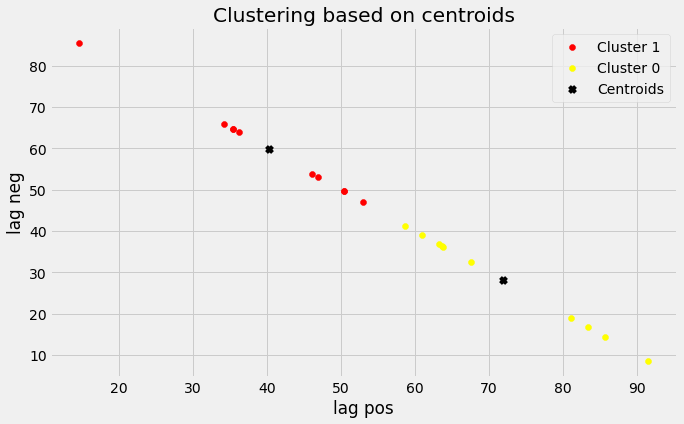

Coordinates of the centroids: [71.94669171 40.21576503] [28.05330829 59.78423497]


In [61]:

kmeans = sklearn.cluster.KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df_percents_IPS[['lag_neg', 'lag_pos']])

df_percents_IPS['cluster'] = kmeans.labels_


plt.figure(figsize=(10, 6))


cores_cluster = {0: 'yellow', 1: 'red'} 

for cluster in df_percents_IPS['cluster'].unique():
    plt.scatter(df_percents_IPS[df_percents_IPS['cluster'] == cluster]['lag_neg'], 
                df_percents_IPS[df_percents_IPS['cluster'] == cluster]['lag_pos'],
                label=f'Cluster {cluster}', color=cores_cluster[cluster])


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='x', color='black', label='Centroids')

plt.xlabel('lag pos')
plt.ylabel('lag neg')

plt.title('Clustering based on centroids')
plt.legend()
plt.savefig("IMG resultados 2/ips_clus_1.png", bbox_inches='tight')
plt.show()

print("Coordinates of the centroids:", kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])


In [62]:
df_percents_IPS

,lag_neg,lag_zero,lag_pos,cluster
Apple iPhone 14 Plus 128GB,50.335570,0.0,49.664430,1
Apple iPhone 14 Pro Max 128GB,85.714286,0.0,14.285714,0
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,1
Apple iPhone 11 64GB,46.905537,0.0,53.094463,1
Apple iPhone 14 Plus 256GB,63.228700,0.0,36.771300,0
Apple iPhone 14 Pro 256GB,63.636364,0.0,36.363636,0
Apple iPhone 14 512GB,14.532872,0.0,85.467128,1
Vivo Y22s 128GB,52.905199,0.0,47.094801,1
Apple iPhone 14 256GB,91.540785,0.0,8.459215,0
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,1


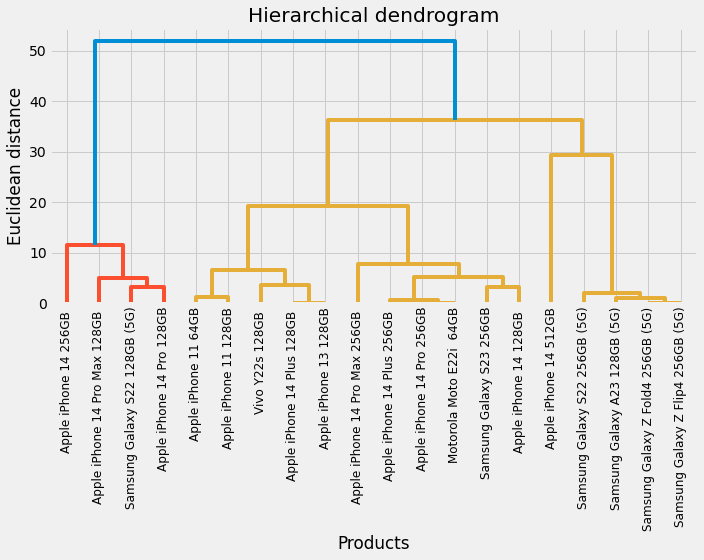

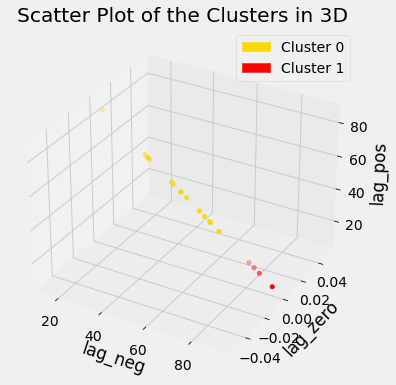

In [63]:

lag_data = df_percents_IPS[['lag_neg',  'lag_pos']]


scaler = StandardScaler()
lag_data_scaled = list(zip(df_percents_IPS['lag_neg'], df_percents_IPS['lag_pos']))


Z = linkage(lag_data_scaled, method='average', metric='euclidean')


plt.figure(figsize=(10, 8))
dendrogram(Z, labels=df_selected['product'].values)
plt.title('Hierarchical dendrogram')
plt.xlabel('Products')
plt.ylabel('Euclidean distance')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.savefig("IMG resultados 2/ips_clus_2.png", bbox_inches='tight')
plt.show()


import matplotlib.patches as mpatches


cores_cluster = {0: '#FFD700',  
                 1: '#FF0000'}  


hierarchical_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(lag_data_scaled)


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


for label in range(2):
    cluster_indices = labels == label
    ax.scatter(df_percents_IPS.loc[cluster_indices, 'lag_neg'], 
               df_percents_IPS.loc[cluster_indices, 'lag_zero'], 
               df_percents_IPS.loc[cluster_indices, 'lag_pos'], 
               c=cores_cluster[label], label=f'Cluster {label}')


ax.set_xlabel('lag_neg')
ax.set_ylabel('lag_zero')
ax.set_zlabel('lag_pos')


legend_handles = [mpatches.Patch(color=cores_cluster[label], label=f'Cluster {label}') for label in range(2)]


plt.legend(handles=legend_handles, loc='upper right')


plt.title('Scatter Plot of the Clusters in 3D')
plt.savefig("IMG resultados 2/ips_clus_2_1.png", bbox_inches='tight')
plt.show()


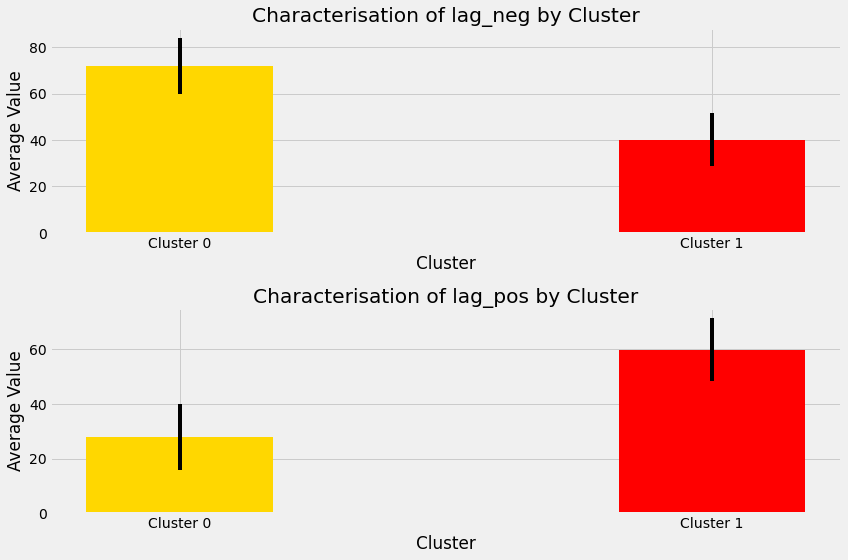

In [64]:

cluster_stats = df_percents_IPS.groupby('cluster')[['lag_neg', 'lag_pos']].agg(['mean', 'std'])


n_clusters = len(cluster_stats)
n_lags = len(cluster_stats.columns.levels[0])
bar_width = 0.35
index = np.arange(n_clusters)

fig, axes = plt.subplots(nrows=n_lags, ncols=1, figsize=(12, 8))

lag_types = cluster_stats.columns.levels[0]


cores_cluster = {0: '#FFD700',  # Amarelo
                 1: '#FF0000'}  # Vermelho

for i, lag_type in enumerate(lag_types):
    means = cluster_stats[lag_type]['mean']
    stds = cluster_stats[lag_type]['std']
    ax = axes[i]
    for cluster, cor in cores_cluster.items():
        ax.bar(cluster, means[cluster], bar_width, yerr=stds[cluster], label=f'Cluster {cluster}', color=cor)
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Average Value')
    ax.set_title(f'Characterisation of {lag_type} by Cluster')
    ax.set_xticks(list(cores_cluster.keys()))
    ax.set_xticklabels([f'Cluster {i}' for i in list(cores_cluster.keys())])

plt.tight_layout()
plt.savefig("IMG resultados 2/ips_clus_3.png", bbox_inches='tight')
plt.show()


# correspondencia entre DTW e IPS

In [65]:
df_percents_IPS

,lag_neg,lag_zero,lag_pos,cluster
Apple iPhone 14 Plus 128GB,50.335570,0.0,49.664430,1
Apple iPhone 14 Pro Max 128GB,85.714286,0.0,14.285714,0
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,1
Apple iPhone 11 64GB,46.905537,0.0,53.094463,1
Apple iPhone 14 Plus 256GB,63.228700,0.0,36.771300,0
Apple iPhone 14 Pro 256GB,63.636364,0.0,36.363636,0
Apple iPhone 14 512GB,14.532872,0.0,85.467128,1
Vivo Y22s 128GB,52.905199,0.0,47.094801,1
Apple iPhone 14 256GB,91.540785,0.0,8.459215,0
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,1


In [66]:
df_selected_dtw = df_result_best_path[['lag_neg', 'lag_zero', 'lag_pos']]


In [67]:
# Calculating the correlation between the IPS and DTW time series
correlation = df_percents_IPS.corrwith(df_selected_dtw, axis=0)

print(correlation)


lag_neg     0.454235
lag_zero         NaN
lag_pos     0.585177
cluster          NaN
dtype: float64


# chi-square DTW

In [68]:
df_max_values2

,dtw best path,IPS
Apple iPhone 14 Plus 128GB,lag_neg,lag_neg
Apple iPhone 14 Pro Max 128GB,lag_neg,lag_neg
Samsung Galaxy S22 256GB (5G),lag_pos,lag_pos
Apple iPhone 11 64GB,lag_neg,lag_pos
Apple iPhone 14 Plus 256GB,lag_neg,lag_neg
Apple iPhone 14 Pro 256GB,lag_neg,lag_neg
Apple iPhone 14 512GB,lag_pos,lag_pos
Vivo Y22s 128GB,lag_pos,lag_neg
Apple iPhone 14 256GB,lag_zero,lag_neg
Samsung Galaxy A23 128GB (5G),lag_pos,lag_pos


In [69]:
df_dtw_max_values_counts_1=df_max_values2['dtw best path'].value_counts()
df_dtw_max_values_counts_1

dtw best path
lag_pos     10
lag_neg      9
lag_zero     1
Name: count, dtype: int64

In [70]:
df_dtw_max_values_counts_1=df_dtw_max_values_counts_1.rename_axis('dtw best path')\
                                             .reset_index(name='n')\
                                             .sort_values('dtw best path')

In [71]:
df_dtw_max_values_counts_1

,dtw best path,n
1,lag_neg,9
0,lag_pos,10
2,lag_zero,1


In [72]:
hypothesized_dtw_1=pd.DataFrame({
    'dtw best path':['lag_neg','lag_pos','lag_zero'],
    'prop':[1/3,1/3,1/3]
})
hypothesized_dtw_1

,dtw best path,prop
0,lag_neg,0.333333
1,lag_pos,0.333333
2,lag_zero,0.333333


In [73]:
n_total=len(df_max_values2)
hypothesized_dtw_1["n"]=hypothesized_dtw_1["prop"]*n_total
hypothesized_dtw_1

,dtw best path,prop,n
0,lag_neg,0.333333,6.666667
1,lag_pos,0.333333,6.666667
2,lag_zero,0.333333,6.666667


<function matplotlib.pyplot.show(close=None, block=None)>

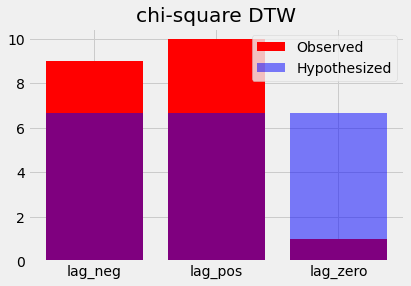

In [74]:
plt.bar(df_dtw_max_values_counts_1['dtw best path'],df_dtw_max_values_counts_1['n'], color='red', label='Observed')

plt.bar(hypothesized_dtw_1['dtw best path'], hypothesized_dtw_1['n'], alpha=0.5, color='blue', label='Hypothesized')

plt.title("chi-square DTW")
plt.legend()
plt.show

In [75]:
chisquare(f_obs=df_dtw_max_values_counts_1['n'],f_exp=hypothesized_dtw_1['n'])

Power_divergenceResult(statistic=7.300000000000001, pvalue=0.025991128778755344)

## chi-square dtw with pos_lag and neg_lag

In [76]:
df_dtw_max_values_counts=df_max_values2['dtw best path'].value_counts()

df_dtw_max_values_counts = df_dtw_max_values_counts[df_dtw_max_values_counts.index != 'lag_zero']
df_dtw_max_values_counts = df_dtw_max_values_counts.rename_axis('dtw best path') \
                                                   .reset_index(name='n') \
                                                   .sort_values('dtw best path')
df_dtw_max_values_counts

,dtw best path,n
1,lag_neg,9
0,lag_pos,10


In [77]:
hypothesized_dtw=pd.DataFrame({
    'dtw best path':['lag_neg','lag_pos'],
    'prop':[1/2,1/2]
})
hypothesized_dtw

,dtw best path,prop
0,lag_neg,0.5
1,lag_pos,0.5


In [78]:
n_total=len(df_max_values2)
hypothesized_dtw["n"]=hypothesized_dtw["prop"]*n_total
hypothesized_dtw

,dtw best path,prop,n
0,lag_neg,0.5,10.0
1,lag_pos,0.5,10.0


<function matplotlib.pyplot.show(close=None, block=None)>

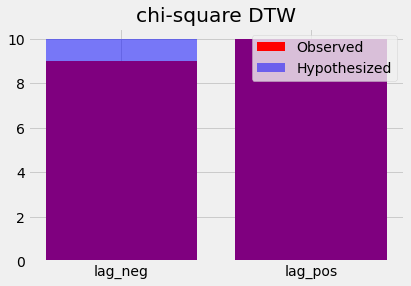

In [79]:
plt.bar(df_dtw_max_values_counts['dtw best path'],df_dtw_max_values_counts['n'], color='red', label='Observed')

plt.bar(hypothesized_dtw['dtw best path'], hypothesized_dtw['n'], alpha=0.5, color='blue', label='Hypothesized')

plt.title("chi-square DTW")
plt.legend()
plt.show

In [80]:


hypothesized_values = hypothesized_dtw['n'][::-1].repeat(len(df_dtw_max_values_counts))


hypothesized_values = hypothesized_values[:len(df_dtw_max_values_counts['n'])]


observed_freq = df_dtw_max_values_counts['n'] / df_dtw_max_values_counts['n'].sum()
expected_freq = hypothesized_values / hypothesized_values.sum()


chi2_stat, p_val = chisquare(f_obs=observed_freq, f_exp=expected_freq)
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)


Chi-square statistic: 0.0027700831024930744
P-value: 0.958025455470674


# chi-square IPS

In [81]:
df_ips_max_values_counts=df_max_values2['IPS'].value_counts()
df_ips_max_values_counts

IPS
lag_neg    13
lag_pos     7
Name: count, dtype: int64

In [82]:
df_ips_max_values_counts=df_max_values2['IPS'].value_counts()


df_ips_max_values_counts = df_ips_max_values_counts.rename_axis('IPS') \
                                                   .reset_index(name='n') \
                                                   .sort_values('IPS')
df_ips_max_values_counts

,IPS,n
0,lag_neg,13
1,lag_pos,7


In [83]:
hypothesized_ips=pd.DataFrame({
    'IPS':['lag_neg','lag_pos'],
    'prop':[1/2,1/2]
})
hypothesized_ips

,IPS,prop
0,lag_neg,0.5
1,lag_pos,0.5


In [84]:
n_total=len(df_max_values2)
hypothesized_ips["n"]=hypothesized_ips["prop"]*n_total
hypothesized_ips

,IPS,prop,n
0,lag_neg,0.5,10.0
1,lag_pos,0.5,10.0


<function matplotlib.pyplot.show(close=None, block=None)>

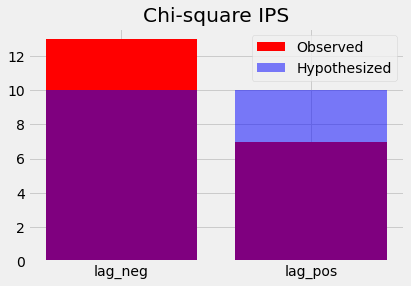

In [85]:
plt.bar(df_ips_max_values_counts['IPS'],df_ips_max_values_counts['n'], color='red', label='Observed')

plt.bar(hypothesized_ips['IPS'], hypothesized_ips['n'], alpha=0.5, color='blue', label='Hypothesized')

plt.title("Chi-square IPS")
plt.legend()
plt.show

In [86]:
chisquare(f_obs=df_ips_max_values_counts['n'],f_exp=hypothesized_ips['n'])

Power_divergenceResult(statistic=1.8, pvalue=0.17971249487899593)

# Preparação para analise da dados pre-processamento

In [87]:
df_max_values2

,dtw best path,IPS
Apple iPhone 14 Plus 128GB,lag_neg,lag_neg
Apple iPhone 14 Pro Max 128GB,lag_neg,lag_neg
Samsung Galaxy S22 256GB (5G),lag_pos,lag_pos
Apple iPhone 11 64GB,lag_neg,lag_pos
Apple iPhone 14 Plus 256GB,lag_neg,lag_neg
Apple iPhone 14 Pro 256GB,lag_neg,lag_neg
Apple iPhone 14 512GB,lag_pos,lag_pos
Vivo Y22s 128GB,lag_pos,lag_neg
Apple iPhone 14 256GB,lag_zero,lag_neg
Samsung Galaxy A23 128GB (5G),lag_pos,lag_pos


In [88]:

different_products = []


for index, row in df_max_values2.iterrows():
    product = index  
    dtw_best_path = row['dtw best path']  
    ips = row['IPS']  
    
    
    if dtw_best_path != ips:
        different_products.append(produto)


print("Lista de produtos com valores das colunas diferentes:")
for product in different_products:
    print(product)


Lista de produtos com valores das colunas diferentes:
Motorola Moto E22i  64GB
Motorola Moto E22i  64GB
Motorola Moto E22i  64GB
Motorola Moto E22i  64GB
Motorola Moto E22i  64GB
Motorola Moto E22i  64GB


In [89]:
df_company1 =df_company1[(df_company1 != '-').all(axis=1)].dropna()
df_company1=df_company1.replace('[,]', '', regex=True)
df_company1=df_company1.replace('[\$,]', '', regex=True).astype(float)/1000
normalize_time_serie_Zscore(df_company1)
df_company1

,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
2023-05-22,1000.8,1272.0,628.8,420.0,1164.0,1272.0,1168.8,220.8,1008.0,232.8,900.0,568.8,744.0,912.0,1396.8,624.0,1132.8,1188.0,804.0,106.8
2023-05-23,1000.8,1272.0,628.8,420.0,1164.0,1272.0,1168.8,220.8,1008.0,232.8,900.0,568.8,744.0,912.0,1396.8,624.0,1132.8,1188.0,804.0,106.8
2023-05-24,1000.8,1272.0,628.8,420.0,1164.0,1272.0,1168.8,220.8,1008.0,232.8,900.0,568.8,744.0,912.0,1396.8,624.0,1132.8,1188.0,804.0,106.8
2023-05-25,1000.8,1272.0,628.8,420.0,1164.0,1272.0,1168.8,220.8,1008.0,232.8,900.0,568.8,744.0,912.0,1396.8,624.0,1132.8,1188.0,804.0,106.8
2023-05-26,1000.8,1248.0,624.0,396.0,1164.0,1216.8,1168.8,204.0,984.0,232.8,900.0,568.8,744.0,912.0,1332.0,624.0,1128.0,1188.0,804.0,106.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-09,1044.0,1156.8,552.0,442.8,1168.8,1260.0,1128.0,150.0,897.6,216.0,840.0,568.8,732.0,865.2,1396.8,604.8,1002.0,1188.0,756.0,76.8
2023-12-10,1044.0,1156.8,552.0,442.8,1168.8,1260.0,1128.0,150.0,897.6,216.0,840.0,568.8,732.0,865.2,1396.8,604.8,1002.0,1188.0,756.0,76.8
2023-12-11,1044.0,1156.8,552.0,442.8,1168.8,1260.0,1128.0,150.0,897.6,216.0,840.0,568.8,732.0,865.2,1396.8,604.8,1002.0,1188.0,756.0,76.8
2023-12-12,1044.0,1156.8,552.0,430.8,1168.8,1260.0,1128.0,150.0,897.6,216.0,840.0,568.8,744.0,865.2,1396.8,604.8,1002.0,1188.0,756.0,76.8


In [90]:
df_company2 = df_company2[(df_company2 != '-').all(axis=1)].dropna()
df_company2 = df_company2.replace('[,]', '', regex=True)
df_company2 = df_company2.replace('[\$,]', '', regex=True)


def convert_to_float(value):
    if isinstance(value, str) and '/' in value:
        return float(value.split('/')[0])
    else:
        return value


df_company2 = df_company2.applymap(convert_to_float).astype(float) / 1000
normalize_time_serie_Zscore(df_company2)

df_company2


/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4468/1485274425.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_company2 = df_company2.applymap(convert_to_float).astype(float) / 1000


,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
2023-02-09,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1049.99,299.99,999.99,549.99,859.99,899.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-02-27,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,999.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-09,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-10,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-12,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-13,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1099.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-24,1039.99,1279.99,899.99,399.99,1149.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,529.99,859.99,929.99,1499.99,749.99,1179.99,1999.99,1249.99,109.99
2023-03-26,1039.99,1279.99,899.99,399.99,1149.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,529.99,859.99,929.99,1499.99,749.99,1179.99,1999.99,1249.99,109.99
2023-03-27,1039.99,1279.99,899.99,399.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,529.99,859.99,929.99,1499.99,749.99,1179.99,1999.99,1249.99,109.99
2023-04-10,979.99,1279.99,899.99,429.99,1099.99,1279.99,1219.99,229.99,979.99,274.99,1099.99,529.99,749.99,829.99,1399.99,549.99,1149.99,1999.99,1249.99,109.99


In [91]:
df_company1

,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
2023-05-22,1000.8,1272.0,628.8,420.0,1164.0,1272.0,1168.8,220.8,1008.0,232.8,900.0,568.8,744.0,912.0,1396.8,624.0,1132.8,1188.0,804.0,106.8
2023-05-23,1000.8,1272.0,628.8,420.0,1164.0,1272.0,1168.8,220.8,1008.0,232.8,900.0,568.8,744.0,912.0,1396.8,624.0,1132.8,1188.0,804.0,106.8
2023-05-24,1000.8,1272.0,628.8,420.0,1164.0,1272.0,1168.8,220.8,1008.0,232.8,900.0,568.8,744.0,912.0,1396.8,624.0,1132.8,1188.0,804.0,106.8
2023-05-25,1000.8,1272.0,628.8,420.0,1164.0,1272.0,1168.8,220.8,1008.0,232.8,900.0,568.8,744.0,912.0,1396.8,624.0,1132.8,1188.0,804.0,106.8
2023-05-26,1000.8,1248.0,624.0,396.0,1164.0,1216.8,1168.8,204.0,984.0,232.8,900.0,568.8,744.0,912.0,1332.0,624.0,1128.0,1188.0,804.0,106.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-09,1044.0,1156.8,552.0,442.8,1168.8,1260.0,1128.0,150.0,897.6,216.0,840.0,568.8,732.0,865.2,1396.8,604.8,1002.0,1188.0,756.0,76.8
2023-12-10,1044.0,1156.8,552.0,442.8,1168.8,1260.0,1128.0,150.0,897.6,216.0,840.0,568.8,732.0,865.2,1396.8,604.8,1002.0,1188.0,756.0,76.8
2023-12-11,1044.0,1156.8,552.0,442.8,1168.8,1260.0,1128.0,150.0,897.6,216.0,840.0,568.8,732.0,865.2,1396.8,604.8,1002.0,1188.0,756.0,76.8
2023-12-12,1044.0,1156.8,552.0,430.8,1168.8,1260.0,1128.0,150.0,897.6,216.0,840.0,568.8,744.0,865.2,1396.8,604.8,1002.0,1188.0,756.0,76.8


In [92]:
df_company2

,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
2023-02-09,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1049.99,299.99,999.99,549.99,859.99,899.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-02-27,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,999.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-09,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-10,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-12,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-13,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1099.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-24,1039.99,1279.99,899.99,399.99,1149.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,529.99,859.99,929.99,1499.99,749.99,1179.99,1999.99,1249.99,109.99
2023-03-26,1039.99,1279.99,899.99,399.99,1149.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,529.99,859.99,929.99,1499.99,749.99,1179.99,1999.99,1249.99,109.99
2023-03-27,1039.99,1279.99,899.99,399.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,529.99,859.99,929.99,1499.99,749.99,1179.99,1999.99,1249.99,109.99
2023-04-10,979.99,1279.99,899.99,429.99,1099.99,1279.99,1219.99,229.99,979.99,274.99,1099.99,529.99,749.99,829.99,1399.99,549.99,1149.99,1999.99,1249.99,109.99


In [93]:
different_products

['Motorola Moto E22i  64GB',
 'Motorola Moto E22i  64GB',
 'Motorola Moto E22i  64GB',
 'Motorola Moto E22i  64GB',
 'Motorola Moto E22i  64GB',
 'Motorola Moto E22i  64GB']

In [94]:
# Crie um DataFrame vazio para armazenar os valores médios
df_mean = pd.DataFrame()

# Itere sobre os produtos em comum
for product in common_products:
    # Calcule a média de cada empresa para o produto atual
    mean_wom = df_company1[product].mean()
    mean_falabella = df_company2[product].mean()
    
    # Adicione os valores médios ao DataFrame df_mean
    df_mean.loc[product, 'Wom / Loyalty'] = mean_wom
    df_mean.loc[product, 'Falabella / Loyalty'] = mean_falabella

df_mean

,Wom / Loyalty,Falabella / Loyalty
Apple iPhone 14 Plus 128GB,1033.514563,1024.990000
Apple iPhone 14 Pro Max 128GB,1186.485437,1314.990000
Samsung Galaxy S22 256GB (5G),611.126214,899.990000
Apple iPhone 11 64GB,423.937864,447.490000
Apple iPhone 14 Plus 256GB,1167.634951,1166.656667
Apple iPhone 14 Pro 256GB,1259.965049,1317.490000
Apple iPhone 14 512GB,1142.306796,1361.656667
Vivo Y22s 128GB,178.462136,229.990000
Apple iPhone 14 256GB,923.114563,1037.490000
Samsung Galaxy A23 128GB (5G),219.227204,277.073333


In [95]:
df_selected_2 = df_company1

variances_c1 = df_selected_2.dropna().var()



print("variância para cada produto:")
print(variances_c1)


variância para cada produto:
Apple iPhone 14 Plus 128GB           3.446998e+02
Apple iPhone 14 Pro Max 128GB        1.888942e+03
Samsung Galaxy S22 256GB (5G)        2.172158e+03
Apple iPhone 11 64GB                 2.599423e+02
Apple iPhone 14 Plus 256GB           4.255553e+00
Apple iPhone 14 Pro 256GB            1.275336e+02
Apple iPhone 14 512GB                7.526125e+02
Vivo Y22s 128GB                      6.878681e+02
Apple iPhone 14 256GB                2.065113e+03
Samsung Galaxy A23 128GB (5G)        2.483429e+02
Samsung Galaxy S23 256GB             1.496165e+03
Apple iPhone 11 128GB                5.195098e-26
Apple iPhone 13 128GB                1.281516e+03
Apple iPhone 14 128GB                1.856212e+03
Apple iPhone 14 Pro Max 256GB        2.132830e+02
Samsung Galaxy S22 128GB (5G)        1.480748e+02
Apple iPhone 14 Pro 128GB            2.886670e+03
Samsung Galaxy Z Fold4 256GB (5G)    0.000000e+00
Samsung Galaxy Z Flip4 256GB (5G)    3.293143e+02
Motorola Moto E22i  6

In [96]:
df_selected_2 = df_company2
variances_c2 = df_selected_2.dropna().var()


# Imprimir as razões
print("variância para cada produto:")
print(variances_c2)


variância para cada produto:
Apple iPhone 14 Plus 128GB           7.363636e+02
Apple iPhone 14 Pro Max 128GB        1.336364e+03
Samsung Galaxy S22 256GB (5G)        1.409967e-26
Apple iPhone 11 64GB                 1.275000e+03
Apple iPhone 14 Plus 256GB           1.969697e+03
Apple iPhone 14 Pro 256GB            5.113636e+02
Apple iPhone 14 512GB                4.378788e+03
Vivo Y22s 128GB                      7.931064e-27
Apple iPhone 14 256GB                3.347727e+03
Samsung Galaxy A23 128GB (5G)        5.208333e+01
Samsung Galaxy S23 256GB             6.363636e+03
Apple iPhone 11 128GB                3.151515e+02
Apple iPhone 13 128GB                2.475000e+03
Apple iPhone 14 128GB                1.238636e+03
Apple iPhone 14 Pro Max 256GB        2.045455e+03
Samsung Galaxy S22 128GB (5G)        6.436364e+03
Apple iPhone 14 Pro 128GB            4.568182e+02
Samsung Galaxy Z Fold4 256GB (5G)    2.255947e-25
Samsung Galaxy Z Flip4 256GB (5G)    1.687500e+04
Motorola Moto E22i  6

In [97]:
df_selected_dtw_best_path=df_selected_dtw_best_path

df_selected_dtw_best_path['variances_c1'] = variances_c1
df_selected_dtw_best_path['variances_c2'] = variances_c2
df_selected_dtw_best_path

/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4468/814233315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_dtw_best_path['variances_c1'] = variances_c1
/var/folders/4p/q7_ch2s94c37xj9l5h3fltgh0000gn/T/ipykernel_4468/814233315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_dtw_best_path['variances_c2'] = variances_c2


,lag_neg,lag_zero,lag_pos,variances_c1,variances_c2
Apple iPhone 14 Plus 128GB,62.461538,16.923077,20.615385,3.446998e+02,7.363636e+02
Apple iPhone 14 Pro Max 128GB,60.802469,0.617284,38.580247,1.888942e+03,1.336364e+03
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,2.172158e+03,1.409967e-26
Apple iPhone 11 64GB,56.770833,1.562500,41.666667,2.599423e+02,1.275000e+03
Apple iPhone 14 Plus 256GB,87.719298,0.438596,11.842105,4.255553e+00,1.969697e+03
Apple iPhone 14 Pro 256GB,79.566563,0.928793,19.504644,1.275336e+02,5.113636e+02
Apple iPhone 14 512GB,30.746269,11.343284,57.910448,7.526125e+02,4.378788e+03
Vivo Y22s 128GB,27.594937,0.506329,71.898734,6.878681e+02,7.931064e-27
Apple iPhone 14 256GB,6.683805,47.300771,46.015424,2.065113e+03,3.347727e+03
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,2.483429e+02,5.208333e+01


In [98]:
# Selecionar apenas as linhas com índices presentes em produtos_diferentes
df_selected_ips = df_percents_IPS
df_selected_ips['variances_c1'] = variances_c1
df_selected_ips['variances_c2'] = variances_c2
# Imprimir o DataFrame resultante
df_selected_ips


,lag_neg,lag_zero,lag_pos,cluster,variances_c1,variances_c2
Apple iPhone 14 Plus 128GB,50.335570,0.0,49.664430,1,3.446998e+02,7.363636e+02
Apple iPhone 14 Pro Max 128GB,85.714286,0.0,14.285714,0,1.888942e+03,1.336364e+03
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,1,2.172158e+03,1.409967e-26
Apple iPhone 11 64GB,46.905537,0.0,53.094463,1,2.599423e+02,1.275000e+03
Apple iPhone 14 Plus 256GB,63.228700,0.0,36.771300,0,4.255553e+00,1.969697e+03
Apple iPhone 14 Pro 256GB,63.636364,0.0,36.363636,0,1.275336e+02,5.113636e+02
Apple iPhone 14 512GB,14.532872,0.0,85.467128,1,7.526125e+02,4.378788e+03
Vivo Y22s 128GB,52.905199,0.0,47.094801,1,6.878681e+02,7.931064e-27
Apple iPhone 14 256GB,91.540785,0.0,8.459215,0,2.065113e+03,3.347727e+03
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,1,2.483429e+02,5.208333e+01


In [99]:
different_products

['Motorola Moto E22i  64GB',
 'Motorola Moto E22i  64GB',
 'Motorola Moto E22i  64GB',
 'Motorola Moto E22i  64GB',
 'Motorola Moto E22i  64GB',
 'Motorola Moto E22i  64GB']

In [100]:
df_company2

,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
2023-02-09,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1049.99,299.99,999.99,549.99,859.99,899.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-02-27,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,999.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-09,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-10,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-12,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-13,1039.99,1349.99,899.99,479.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1099.99,549.99,859.99,929.99,1499.99,749.99,1199.99,1999.99,1249.99,109.99
2023-03-24,1039.99,1279.99,899.99,399.99,1149.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,529.99,859.99,929.99,1499.99,749.99,1179.99,1999.99,1249.99,109.99
2023-03-26,1039.99,1279.99,899.99,399.99,1149.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,529.99,859.99,929.99,1499.99,749.99,1179.99,1999.99,1249.99,109.99
2023-03-27,1039.99,1279.99,899.99,399.99,1199.99,1329.99,1389.99,229.99,1069.99,274.99,1199.99,529.99,859.99,929.99,1499.99,749.99,1179.99,1999.99,1249.99,109.99
2023-04-10,979.99,1279.99,899.99,429.99,1099.99,1279.99,1219.99,229.99,979.99,274.99,1099.99,529.99,749.99,829.99,1399.99,549.99,1149.99,1999.99,1249.99,109.99


In [101]:

freq_dict = {}


for product in different_products:


    frequencies = df_company1[product].value_counts()
    

    freq_dict[product] = frequencies

df_freq1 = pd.DataFrame(freq_dict)

df_freq1


,Motorola Moto E22i 64GB
Motorola Moto E22i 64GB,
106.8,52
76.8,52
102.0,50
72.0,27
90.0,25


In [102]:
freq_dict = {}


for product in different_products:

    frequencies = df_company2[product].value_counts()
    

    freq_dict[product] = frequencies


df_freq2 = pd.DataFrame(freq_dict)

df_freq2


,Motorola Moto E22i 64GB
Motorola Moto E22i 64GB,
109.99,11
99.99,1


In [103]:

freq_dict = {}


for product in common_products:

    frequencies = df_company1[product].value_counts()
    

    freq_dict[product] = frequencies


df_freq1 = pd.DataFrame(freq_dict)

df_freq1


,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0
76.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0
90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0
102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
106.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248.0,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260.0,NaN,NaN,NaN,NaN,NaN,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1272.0,NaN,4.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN


In [104]:

freq_dict = {}


for product in common_products:

    
    frequencies = df_company2[product].value_counts()
    
    
    freq_dict[product] = frequencies


df_freq2 = pd.DataFrame(freq_dict)

df_freq2


,Apple iPhone 14 Plus 128GB,Apple iPhone 14 Pro Max 128GB,Samsung Galaxy S22 256GB (5G),Apple iPhone 11 64GB,Apple iPhone 14 Plus 256GB,Apple iPhone 14 Pro 256GB,Apple iPhone 14 512GB,Vivo Y22s 128GB,Apple iPhone 14 256GB,Samsung Galaxy A23 128GB (5G),Samsung Galaxy S23 256GB,Apple iPhone 11 128GB,Apple iPhone 13 128GB,Apple iPhone 14 128GB,Apple iPhone 14 Pro Max 256GB,Samsung Galaxy S22 128GB (5G),Apple iPhone 14 Pro 128GB,Samsung Galaxy Z Fold4 256GB (5G),Samsung Galaxy Z Flip4 256GB (5G),Motorola Moto E22i 64GB
99.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
109.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
229.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399.99,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
429.99,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479.99,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
common_products

['Apple iPhone 14 Plus 128GB ',
 'Apple iPhone 14 Pro Max 128GB ',
 'Samsung Galaxy S22 256GB (5G)',
 'Apple iPhone 11 64GB',
 'Apple iPhone 14 Plus 256GB ',
 'Apple iPhone 14 Pro 256GB',
 'Apple iPhone 14 512GB',
 'Vivo Y22s 128GB ',
 'Apple iPhone 14 256GB ',
 'Samsung Galaxy A23 128GB (5G)',
 'Samsung Galaxy S23 256GB',
 'Apple iPhone 11 128GB',
 'Apple iPhone 13 128GB',
 'Apple iPhone 14 128GB ',
 'Apple iPhone 14 Pro Max 256GB ',
 'Samsung Galaxy S22 128GB (5G)',
 'Apple iPhone 14 Pro 128GB',
 'Samsung Galaxy Z Fold4 256GB (5G)',
 'Samsung Galaxy Z Flip4 256GB (5G)',
 'Motorola Moto E22i  64GB']

In [106]:
# Dados
c_yellow = ['Apple iPhone 13 128GB','Samsung Galaxy Z Fold4 256GB (5G)','Apple iPhone 11 128GB',
             'Vivo Y22s 128GB ','Apple iPhone 14 512GB', 'Samsung Galaxy Z Flip4 256GB (5G)',
             'Samsung Galaxy A23 128GB (5G)','Samsung Galaxy S23 256GB','Apple iPhone 14 128GB ',
             'Samsung Galaxy S22 256GB (5G)']

c_red = ['Apple iPhone 14 Pro 128GB', 'Samsung Galaxy S22 128GB (5G)', 'Apple iPhone 14 Pro 256GB',
              'Motorola Moto E22i  64GB','Apple iPhone 14 Pro Max 256GB ', 'Apple iPhone 14 Plus 256GB ',
              'Apple iPhone 14 Plus 128GB ','Apple iPhone 14 Pro Max 128GB ','Apple iPhone 11 64GB']

c_blue = ['Apple iPhone 14 256GB ']

dados_yellow = [df_mean['Wom / Loyalty'][product] for product in c_yellow]
dados_red = [df_mean['Wom / Loyalty'][product] for product in c_red]
dados_blue = [df_mean['Wom / Loyalty'][product] for product in c_blue]
dados_yellow_FA = [df_mean['Falabella / Loyalty'][product] for product in c_yellow]
dados_red_FA = [df_mean['Falabella / Loyalty'][product] for product in c_red]
dados_blue_FA = [df_mean['Falabella / Loyalty'][product] for product in c_blue]

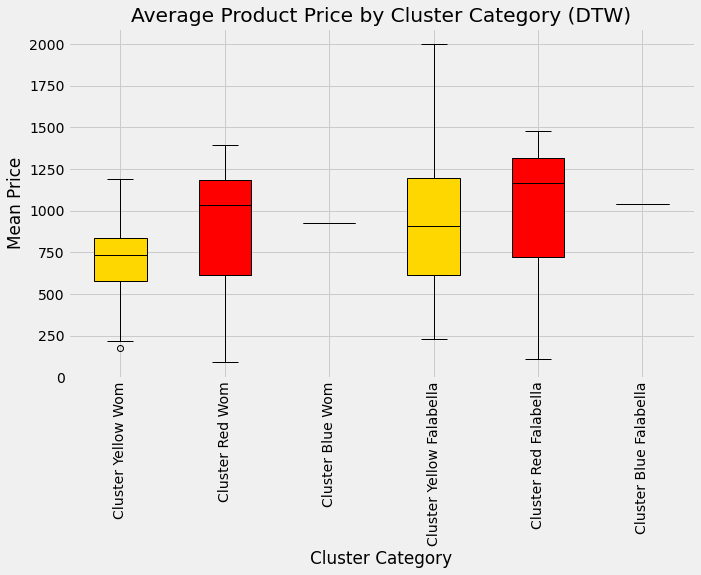

In [107]:
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar caixas de bigodes para todas as categorias
boxplot = plt.boxplot([dados_yellow, dados_red, dados_blue, dados_yellow_FA, dados_red_FA, dados_blue_FA], 
                      labels=['Cluster Yellow Wom', 'Cluster Red Wom', 'Cluster Blue Wom',
                              'Cluster Yellow Falabella', 'Cluster Red Falabella', 'Cluster Blue Falabella'],
                      patch_artist=True)

# Definir cores para as caixas de bigodes
cores = ['#FFD700', '#FF0000', '#0000FF', '#FFD700', '#FF0000', '#0000FF']
for i, patch in enumerate(boxplot['boxes']):
    patch.set_facecolor(cores[i])

# Definir cor da linha
for linha in boxplot['medians']:
    linha.set(color='black')  # Cor da linha

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90)

# Configurações adicionais
plt.title('Average Product Price by Cluster Category (DTW)')
plt.ylabel('Mean Price')
plt.xlabel('Cluster Category')
plt.savefig("IMG resultados 2/dtw_big.png", bbox_inches='tight')
plt.show()


In [108]:
c2_yellow = ['Apple iPhone 14 Pro 256GB','Motorola Moto E22i  64GB','Apple iPhone 14 Pro Max 256GB ', 'Apple iPhone 14 Plus 256GB ',
              'Apple iPhone 14 Plus 128GB ','Apple iPhone 11 64GB','Apple iPhone 13 128GB','Samsung Galaxy Z Fold4 256GB (5G)','Apple iPhone 11 128GB',
             'Vivo Y22s 128GB ','Apple iPhone 14 512GB', 'Samsung Galaxy Z Flip4 256GB (5G)',
             'Samsung Galaxy A23 128GB (5G)','Samsung Galaxy S23 256GB','Apple iPhone 14 128GB ',
             'Samsung Galaxy S22 256GB (5G)']

c2_red = ['Apple iPhone 14 256GB ','Apple iPhone 14 Pro Max 128GB ','Apple iPhone 14 Pro 128GB','Samsung Galaxy S22 128GB (5G)']


              
        


dados_yellow_2 = [df_mean['Wom / Loyalty'][product] for product in c2_yellow]
dados_red_2 = [df_mean['Wom / Loyalty'][product] for product in c2_red]

dados_yellow_FA_2 = [df_mean['Falabella / Loyalty'][product] for product in c2_yellow]
dados_red_FA_2 = [df_mean['Falabella / Loyalty'][product] for product in c2_red]


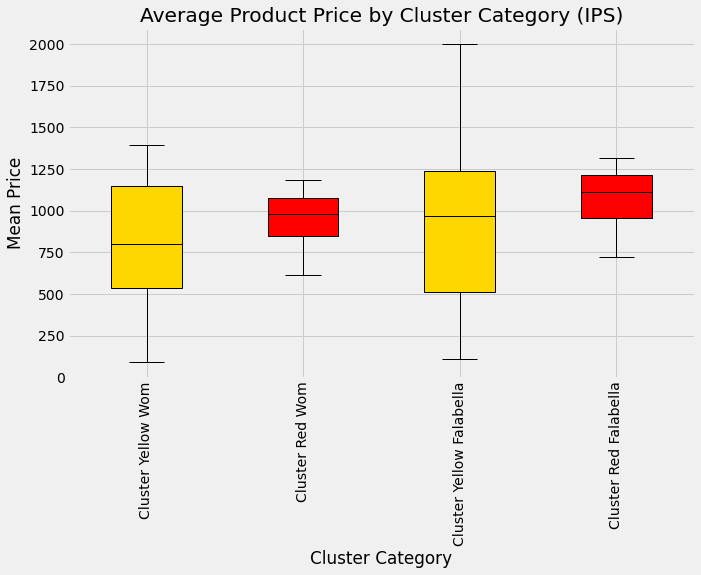

In [109]:
# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Plotar caixas de bigodes para todas as categorias
boxplot = plt.boxplot([dados_yellow_2, dados_red_2, dados_yellow_FA_2, dados_red_FA_2], 
                      labels=['Cluster Yellow Wom', 'Cluster Red Wom',
                              'Cluster Yellow Falabella', 'Cluster Red Falabella'],
                      patch_artist=True)

# Definir cores para as caixas de bigodes
cores = ['#FFD700', '#FF0000', '#FFD700', '#FF0000' ]
for i, patch in enumerate(boxplot['boxes']):
    patch.set_facecolor(cores[i])

# Definir cor da linha
for linha in boxplot['medians']:
    linha.set(color='black')  # Cor da linha

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=90)

# Configurações adicionais
plt.title('Average Product Price by Cluster Category (IPS)')
plt.ylabel('Mean Price')
plt.xlabel('Cluster Category')
plt.savefig("IMG resultados 2/ips_big.png", bbox_inches='tight')
plt.show()


In [110]:

count_dict = {}


for product in common_products:
    
    unique_values_count = df_company1[product].nunique()
    
  
    count_dict[product] = unique_values_count


df_unique_values_count_1 = pd.DataFrame.from_dict(count_dict, orient='index', columns=['Values Count: Wom'])


print(df_unique_values_count_1)


                                   Values Count: Wom
Apple iPhone 14 Plus 128GB                         2
Apple iPhone 14 Pro Max 128GB                      3
Samsung Galaxy S22 256GB (5G)                      9
Apple iPhone 11 64GB                               7
Apple iPhone 14 Plus 256GB                         2
Apple iPhone 14 Pro 256GB                          3
Apple iPhone 14 512GB                              3
Vivo Y22s 128GB                                    4
Apple iPhone 14 256GB                              3
Samsung Galaxy A23 128GB (5G)                      9
Samsung Galaxy S23 256GB                           5
Apple iPhone 11 128GB                              1
Apple iPhone 13 128GB                              4
Apple iPhone 14 128GB                              4
Apple iPhone 14 Pro Max 256GB                      2
Samsung Galaxy S22 128GB (5G)                      3
Apple iPhone 14 Pro 128GB                          4
Samsung Galaxy Z Fold4 256GB (5G)             

In [111]:

count_dict = {}


for product in common_products:

    unique_values_count = df_company2[product].nunique()
    

    count_dict[product] = unique_values_count


df_unique_values_count_2 = pd.DataFrame.from_dict(count_dict, orient='index', columns=['Values Count: Falabella'])


print(df_unique_values_count_2)


                                   Values Count: Falabella
Apple iPhone 14 Plus 128GB                               2
Apple iPhone 14 Pro Max 128GB                            2
Samsung Galaxy S22 256GB (5G)                            1
Apple iPhone 11 64GB                                     3
Apple iPhone 14 Plus 256GB                               3
Apple iPhone 14 Pro 256GB                                2
Apple iPhone 14 512GB                                    2
Vivo Y22s 128GB                                          1
Apple iPhone 14 256GB                                    5
Samsung Galaxy A23 128GB (5G)                            2
Samsung Galaxy S23 256GB                                 3
Apple iPhone 11 128GB                                    3
Apple iPhone 13 128GB                                    2
Apple iPhone 14 128GB                                    4
Apple iPhone 14 Pro Max 256GB                            2
Samsung Galaxy S22 128GB (5G)                           

In [112]:
df_selected_dtw_best_path

,lag_neg,lag_zero,lag_pos,variances_c1,variances_c2
Apple iPhone 14 Plus 128GB,62.461538,16.923077,20.615385,3.446998e+02,7.363636e+02
Apple iPhone 14 Pro Max 128GB,60.802469,0.617284,38.580247,1.888942e+03,1.336364e+03
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,2.172158e+03,1.409967e-26
Apple iPhone 11 64GB,56.770833,1.562500,41.666667,2.599423e+02,1.275000e+03
Apple iPhone 14 Plus 256GB,87.719298,0.438596,11.842105,4.255553e+00,1.969697e+03
Apple iPhone 14 Pro 256GB,79.566563,0.928793,19.504644,1.275336e+02,5.113636e+02
Apple iPhone 14 512GB,30.746269,11.343284,57.910448,7.526125e+02,4.378788e+03
Vivo Y22s 128GB,27.594937,0.506329,71.898734,6.878681e+02,7.931064e-27
Apple iPhone 14 256GB,6.683805,47.300771,46.015424,2.065113e+03,3.347727e+03
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,2.483429e+02,5.208333e+01


In [113]:
df_selected_ips

,lag_neg,lag_zero,lag_pos,cluster,variances_c1,variances_c2
Apple iPhone 14 Plus 128GB,50.335570,0.0,49.664430,1,3.446998e+02,7.363636e+02
Apple iPhone 14 Pro Max 128GB,85.714286,0.0,14.285714,0,1.888942e+03,1.336364e+03
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,1,2.172158e+03,1.409967e-26
Apple iPhone 11 64GB,46.905537,0.0,53.094463,1,2.599423e+02,1.275000e+03
Apple iPhone 14 Plus 256GB,63.228700,0.0,36.771300,0,4.255553e+00,1.969697e+03
Apple iPhone 14 Pro 256GB,63.636364,0.0,36.363636,0,1.275336e+02,5.113636e+02
Apple iPhone 14 512GB,14.532872,0.0,85.467128,1,7.526125e+02,4.378788e+03
Vivo Y22s 128GB,52.905199,0.0,47.094801,1,6.878681e+02,7.931064e-27
Apple iPhone 14 256GB,91.540785,0.0,8.459215,0,2.065113e+03,3.347727e+03
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,1,2.483429e+02,5.208333e+01


In [114]:

df_selected_dtw_best_path = pd.concat([df_selected_dtw_best_path, df_unique_values_count_1, df_unique_values_count_2], axis=1)


df_selected_dtw_best_path


,lag_neg,lag_zero,lag_pos,variances_c1,variances_c2,Values Count: Wom,Values Count: Falabella
Apple iPhone 14 Plus 128GB,62.461538,16.923077,20.615385,3.446998e+02,7.363636e+02,2,2
Apple iPhone 14 Pro Max 128GB,60.802469,0.617284,38.580247,1.888942e+03,1.336364e+03,3,2
Samsung Galaxy S22 256GB (5G),0.000000,0.000000,100.000000,2.172158e+03,1.409967e-26,9,1
Apple iPhone 11 64GB,56.770833,1.562500,41.666667,2.599423e+02,1.275000e+03,7,3
Apple iPhone 14 Plus 256GB,87.719298,0.438596,11.842105,4.255553e+00,1.969697e+03,2,3
Apple iPhone 14 Pro 256GB,79.566563,0.928793,19.504644,1.275336e+02,5.113636e+02,3,2
Apple iPhone 14 512GB,30.746269,11.343284,57.910448,7.526125e+02,4.378788e+03,3,2
Vivo Y22s 128GB,27.594937,0.506329,71.898734,6.878681e+02,7.931064e-27,4,1
Apple iPhone 14 256GB,6.683805,47.300771,46.015424,2.065113e+03,3.347727e+03,3,5
Samsung Galaxy A23 128GB (5G),41.326531,5.357143,53.316327,2.483429e+02,5.208333e+01,9,2


In [115]:

df_selected_ips = pd.concat([df_selected_ips, df_unique_values_count_1, df_unique_values_count_2], axis=1)


df_selected_ips

,lag_neg,lag_zero,lag_pos,cluster,variances_c1,variances_c2,Values Count: Wom,Values Count: Falabella
Apple iPhone 14 Plus 128GB,50.335570,0.0,49.664430,1,3.446998e+02,7.363636e+02,2,2
Apple iPhone 14 Pro Max 128GB,85.714286,0.0,14.285714,0,1.888942e+03,1.336364e+03,3,2
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,1,2.172158e+03,1.409967e-26,9,1
Apple iPhone 11 64GB,46.905537,0.0,53.094463,1,2.599423e+02,1.275000e+03,7,3
Apple iPhone 14 Plus 256GB,63.228700,0.0,36.771300,0,4.255553e+00,1.969697e+03,2,3
Apple iPhone 14 Pro 256GB,63.636364,0.0,36.363636,0,1.275336e+02,5.113636e+02,3,2
Apple iPhone 14 512GB,14.532872,0.0,85.467128,1,7.526125e+02,4.378788e+03,3,2
Vivo Y22s 128GB,52.905199,0.0,47.094801,1,6.878681e+02,7.931064e-27,4,1
Apple iPhone 14 256GB,91.540785,0.0,8.459215,0,2.065113e+03,3.347727e+03,3,5
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,1,2.483429e+02,5.208333e+01,9,2


In [116]:
df_selected_ips[['lag_neg', 'lag_zero', 'lag_pos', 'variances_c1', 'variances_c2', 'Values Count: Wom', 'Values Count: Falabella']]


,lag_neg,lag_zero,lag_pos,variances_c1,variances_c2,Values Count: Wom,Values Count: Falabella
Apple iPhone 14 Plus 128GB,50.335570,0.0,49.664430,3.446998e+02,7.363636e+02,2,2
Apple iPhone 14 Pro Max 128GB,85.714286,0.0,14.285714,1.888942e+03,1.336364e+03,3,2
Samsung Galaxy S22 256GB (5G),34.146341,0.0,65.853659,2.172158e+03,1.409967e-26,9,1
Apple iPhone 11 64GB,46.905537,0.0,53.094463,2.599423e+02,1.275000e+03,7,3
Apple iPhone 14 Plus 256GB,63.228700,0.0,36.771300,4.255553e+00,1.969697e+03,2,3
Apple iPhone 14 Pro 256GB,63.636364,0.0,36.363636,1.275336e+02,5.113636e+02,3,2
Apple iPhone 14 512GB,14.532872,0.0,85.467128,7.526125e+02,4.378788e+03,3,2
Vivo Y22s 128GB,52.905199,0.0,47.094801,6.878681e+02,7.931064e-27,4,1
Apple iPhone 14 256GB,91.540785,0.0,8.459215,2.065113e+03,3.347727e+03,3,5
Samsung Galaxy A23 128GB (5G),36.120401,0.0,63.879599,2.483429e+02,5.208333e+01,9,2
